# Flight Price Prediction Project

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 

    1. Time of purchase patterns (making sure last-minute purchases are expensive) 
    2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

### 1. Data Collection

You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). 

The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

### 2. Data Analysis

After cleaning the data, you have to do some analysis on the data. 

Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk?

Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

### 3. Model Building

After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [101]:
import dill

In [102]:

dill.dump_session('new_flight(10_oct).db')

In [2]:
dataset = pd.read_csv("Flight Price Dataset(in csv).csv")

In [6]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953"
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953"
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953"
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953"
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953"


#### The following data has been collected:

Airline Name: This column contains the name of the Flights.

Date of journey: This column contains the date of the trip of the flights in the format (weekday, day month).

Source: This column contains the name of the city, from which the flight took off.

Destination: This column contains the name of the city where the flight landed.

Departure Time: This column contains the time at which the flight took off. The format is of 24 hrs, provided like (HH:MM),where HH stands for hour and MM stands for min.

Arrival Time: This column contains the time at which the flight arrived at the destination. The format is of 24 hrs, provided like (HH:MM), where HH stands for hour and MM stands for min.

Duration: This column contains the total hour taken by the flight to reach the destination. The format is (%h %min), where h stands for hours and min stands for minutes.

Total stops: This column contains the number of stops the flight took before reaching its final destination.

Price: This column contains the price of the ticket of the flight. The currency is in Indian rupees. (This is our target/dependent variable)


In [5]:
dataset = dataset.drop(['Unnamed: 0'],axis =1)

In [9]:
dataset_copy = dataset.copy()

In [25]:
pd.set_option("display.max_rows",None)

In [26]:
pd.set_option("display.max_columns",None)

In [12]:
#start Data cleaning from here

In [59]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day)
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6


In [22]:
#cleaning and seperating day , date and months using datetime function

In [27]:
date1 =pd.to_datetime(dataset["Date of journey"].iloc[0:2004],format="%a, %d %b").dt.day
month1 = pd.to_datetime(dataset["Date of journey"].iloc[0:2004],format="%a, %d %b").dt.month

In [28]:
weekday1 = pd.to_datetime(dataset["Date of journey"].iloc[0:2004],format="%a, %d %b").dt.weekday

In [167]:
date2.head()

2004    23
2005    23
2006    23
2007    23
2008    23
Name: Date of journey, dtype: int64

In [23]:
date2 =pd.to_datetime(dataset["Date of journey"].iloc[2004:2206],format="%a, %b %d").dt.day
month2 = pd.to_datetime(dataset["Date of journey"].iloc[2004:2206],format="%a, %b %d").dt.month
weekday2 = pd.to_datetime(dataset["Date of journey"].iloc[2004:2206],format="%a, %b %d").dt.weekday

In [39]:
dates = []

for i in date2:
    dates.append(i)

In [50]:
weekdays = []

for i in weekday2:
    weekdays.append(i)

In [54]:
months = []

for i in month2:
    months.append(i)

In [58]:
dataset["Date of journey(day)"] = dates

In [60]:
dataset["Date of journey(weekday)"] = weekdays
dataset["Date of journey(month)"] = months

In [61]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month)
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10


In [63]:
#Extracting Hours from departure time
dep_hour1 = pd.to_datetime(dataset["Departure Time"]).dt.hour

# Extracting Minutes 
dep_min1 = pd.to_datetime(dataset["Departure Time"]).dt.minute

In [73]:
arr_time1 = dataset["Arrival Time"].str.split("\n",expand = True )

In [80]:
arr_time1.head()

,0,1
0,20:15,None
1,20:15,None
2,16:35,None
3,14:15,None
4,20:15,None


In [75]:
arr_time2 = arr_time1[0]

In [77]:
arr_day1 = arr_time1[1]

In [ ]:
arr_day1

In [79]:
dataset["arr_time"] = arr_time2

In [81]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10,14:15
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10,20:15


In [82]:
#Extracting Hours from arrival time
arr_hour = pd.to_datetime(dataset["arr_time"]).dt.hour

# Extracting Minutes 
arr_min = pd.to_datetime(dataset["arr_time"]).dt.minute

In [83]:
#adding departure hour and min to the dataset
dataset["Dep_hour"] = dep_hour1
dataset["Dep_min"] = dep_min1

In [84]:
dataset.head(3)

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0


In [85]:
#adding arrival hour and min to the dataset
dataset["Arr_hour"] = arr_hour
dataset["Arr_min"] = arr_min

In [86]:
dataset.head(3)

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35


In [132]:
dataset_n_1 = dataset.copy()

In [225]:
arr_day2 = arr_day1.str.split(" ", n = 2, expand = True )

In [227]:
arrival_day1 = arr_day2[1]

In [230]:
dataset.insert(10,"Arriving day",arrival_day1, True)

In [231]:
dataset["Arriving day"].fillna(value=pd.np.nan, inplace=True)
dataset["Arriving day"] = dataset["Arriving day"].replace(np.nan, "same day")

In [134]:
dataset = dataset.drop([dataset.index[1726]])

In [135]:
dataset['Duration']=dataset['Duration'].str.replace("hr","h")
dataset['Duration']=dataset['Duration'].str.replace("min","m")
dataset['Duration']=dataset['Duration'].str.replace(" h","h")
dataset['Duration']=dataset['Duration'].str.replace(" m","m")

In [143]:
dataset.head(3)

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15,7,35
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15,8,20
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35,8,35


In [137]:
 # Assigning and converting Duration column into list
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" or " h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [141]:
dataset['Duration_hr'] = duration_hours
dataset['Duration_min'] = duration_mins

In [144]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15,7,35
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15,8,20
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35,8,35
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10,14:15,4,55,14,15,9,20
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10,20:15,5,20,20,15,14,55


In [145]:
#splitting the total stops
stops1 = dataset["Total Stops"].str.split("via",expand = True )

In [164]:
stops1.head()

,0,1
0,1 Stop,None
1,1 Stop,None
2,1 Stop,None
3,1 Stop,None
4,1 Stop,None


In [147]:
stops_name = stops1[1]             #stores name of the stops

In [148]:
#to replace "-" with " " 
dataset['Total Stops']=dataset['Total Stops'].str.replace("-"," ")

In [152]:
#splitting the total stops from " "
stops2 = dataset["Total Stops"].str.split(" ",n = 1,expand = True )

In [163]:
stops2.head()

,0,1
0,1,Stop
1,1,Stop
2,1,Stop
3,1,Stop
4,1,Stop


In [154]:
number_of_stops = stops2[0]

In [155]:
dataset['Total number of stops'] = number_of_stops

In [162]:
dataset["Name of the stop(s)"] = stops_name #creating column with the name of the stops

In [171]:
dataset.head(6)

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Total number of stops,Name of the stop(s)
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15,7,35,1,None
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15,8,20,1,None
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35,8,35,1,None
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10,14:15,4,55,14,15,9,20,1,None
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10,20:15,5,20,20,15,14,55,1,None
5,Go First,"Wed, 6 Oct",New Delhi,Mumbai,09:40,11:45,2h 05m,Non Stop,"5,954",6,5,10,11:45,9,40,11,45,2,5,Non,None


In [173]:
name_of_stp = dataset["Name of the stop(s)"].str.split(",",expand = True)

In [176]:
name_of_stp.head()

,0,1,2
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None


In [175]:
dataset["Name of the first stop"] = name_of_stp[0]
dataset["Name of the second stop"] = name_of_stp[1]
dataset["Name of the third stop"] = name_of_stp[2]

In [188]:
dataset_c2 = dataset.copy()

In [199]:
#replacing None with No stops available

dataset["Name of the stop(s)"].fillna(value=pd.np.nan, inplace=True)
dataset["Name of the stop(s)"] = dataset["Name of the stop(s)"].replace(np.nan, "No stop Available")

dataset["Name of the first stop"].fillna(value=pd.np.nan, inplace=True)
dataset["Name of the first stop"] = dataset["Name of the first stop"].replace(np.nan, "No stop Available")

dataset["Name of the second stop"].fillna(value=pd.np.nan, inplace=True)
dataset["Name of the second stop"] = dataset["Name of the second stop"].replace(np.nan, "No stop Available")

dataset["Name of the third stop"].fillna(value=pd.np.nan, inplace=True)
dataset["Name of the third stop"] = dataset["Name of the third stop"].replace(np.nan, "No stop Available")

In [200]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Total number of stops,Name of the stop(s),Name of the first stop,Name of the second stop,Name of the third stop
0,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15,7,35,1,No stop Available,No stop Available,No stop Available,No stop Available
1,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15,8,20,1,No stop Available,No stop Available,No stop Available,No stop Available
2,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35,8,35,1,No stop Available,No stop Available,No stop Available,No stop Available
3,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10,14:15,4,55,14,15,9,20,1,No stop Available,No stop Available,No stop Available,No stop Available
4,Air Asia,"Wed, 6 Oct",New Delhi,Mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10,20:15,5,20,20,15,14,55,1,No stop Available,No stop Available,No stop Available,No stop Available


In [202]:
#converting to lower case
dataset["Airline Name"] = dataset["Airline Name"].str.lower()

dataset["Date of journey"] = dataset["Date of journey"].str.lower()

dataset["Source"] = dataset["Source"].str.lower()

dataset["Destination"] = dataset["Destination"].str.lower()

dataset["Name of the stop(s)"] = dataset["Name of the stop(s)"].str.lower()

dataset["Name of the first stop"] = dataset["Name of the first stop"].str.lower()

dataset["Name of the second stop"] = dataset["Name of the second stop"].str.lower()

dataset["Name of the third stop"] = dataset["Name of the third stop"].str.lower()

dataset["Total number of stops"] = dataset["Total number of stops"].str.lower()

In [203]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Total number of stops,Name of the stop(s),Name of the first stop,Name of the second stop,Name of the third stop
0,air asia,"wed, 6 oct",new delhi,mumbai,12:40,20:15,7h 35m,1 Stop,"5,953",6,5,10,20:15,12,40,20,15,7,35,1,no stop available,no stop available,no stop available,no stop available
1,air asia,"wed, 6 oct",new delhi,mumbai,11:55,20:15,8h 20m,1 Stop,"5,953",6,5,10,20:15,11,55,20,15,8,20,1,no stop available,no stop available,no stop available,no stop available
2,air asia,"wed, 6 oct",new delhi,mumbai,08:00,16:35,8h 35m,1 Stop,"5,953",6,5,10,16:35,8,0,16,35,8,35,1,no stop available,no stop available,no stop available,no stop available
3,air asia,"wed, 6 oct",new delhi,mumbai,04:55,14:15,9h 20m,1 Stop,"5,953",6,5,10,14:15,4,55,14,15,9,20,1,no stop available,no stop available,no stop available,no stop available
4,air asia,"wed, 6 oct",new delhi,mumbai,05:20,20:15,14h 55m,1 Stop,"5,953",6,5,10,20:15,5,20,20,15,14,55,1,no stop available,no stop available,no stop available,no stop available


In [204]:
dataset["Total number of stops"] = dataset["Total number of stops"].replace("non", int(0))

In [206]:
#removing unwanted data from price
dataset["Price"] = dataset["Price"].str.replace("₹","")
dataset["Price"] = dataset["Price"].str.replace(",","")

In [207]:
dataset.head()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,Date of journey(day),Date of journey(weekday),Date of journey(month),arr_time,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Total number of stops,Name of the stop(s),Name of the first stop,Name of the second stop,Name of the third stop
0,air asia,"wed, 6 oct",new delhi,mumbai,12:40,20:15,7h 35m,1 Stop,5953,6,5,10,20:15,12,40,20,15,7,35,1,no stop available,no stop available,no stop available,no stop available
1,air asia,"wed, 6 oct",new delhi,mumbai,11:55,20:15,8h 20m,1 Stop,5953,6,5,10,20:15,11,55,20,15,8,20,1,no stop available,no stop available,no stop available,no stop available
2,air asia,"wed, 6 oct",new delhi,mumbai,08:00,16:35,8h 35m,1 Stop,5953,6,5,10,16:35,8,0,16,35,8,35,1,no stop available,no stop available,no stop available,no stop available
3,air asia,"wed, 6 oct",new delhi,mumbai,04:55,14:15,9h 20m,1 Stop,5953,6,5,10,14:15,4,55,14,15,9,20,1,no stop available,no stop available,no stop available,no stop available
4,air asia,"wed, 6 oct",new delhi,mumbai,05:20,20:15,14h 55m,1 Stop,5953,6,5,10,20:15,5,20,20,15,14,55,1,no stop available,no stop available,no stop available,no stop available


In [209]:
dataset['Price']=dataset['Price'].astype(int)

In [210]:
dataset['Total number of stops']=dataset['Total number of stops'].astype(int)

In [211]:
dataset.dtypes

Airline Name                object
Date of journey             object
Source                      object
Destination                 object
Departure Time              object
Arrival Time                object
Duration                    object
Total Stops                 object
Price                        int32
Date of journey(day)         int64
Date of journey(weekday)     int64
Date of journey(month)       int64
arr_time                    object
Dep_hour                     int64
Dep_min                      int64
Arr_hour                     int64
Arr_min                      int64
Duration_hr                  int64
Duration_min                 int64
Total number of stops        int32
Name of the stop(s)         object
Name of the first stop      object
Name of the second stop     object
Name of the third stop      object
dtype: object

In [212]:
dataset = dataset[["Airline Name","Source","Destination","Date of journey(day)","Date of journey(month)","Date of journey(weekday)",
                  "Dep_hour","Dep_min","Arr_hour","Arr_min","Duration_hr","Duration_min","Total number of stops",
                  "Name of the first stop","Name of the second stop","Name of the third stop","Price","Date of journey",
                  "Departure Time","Arrival Time","Duration","Total Stops","arr_time","Name of the stop(s)"]]

In [214]:
dataset.head()

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price,Date of journey,Departure Time,Arrival Time,Duration,Total Stops,arr_time,Name of the stop(s)
0,air asia,new delhi,mumbai,6,10,5,12,40,20,15,7,35,1,no stop available,no stop available,no stop available,5953,"wed, 6 oct",12:40,20:15,7h 35m,1 Stop,20:15,no stop available
1,air asia,new delhi,mumbai,6,10,5,11,55,20,15,8,20,1,no stop available,no stop available,no stop available,5953,"wed, 6 oct",11:55,20:15,8h 20m,1 Stop,20:15,no stop available
2,air asia,new delhi,mumbai,6,10,5,8,0,16,35,8,35,1,no stop available,no stop available,no stop available,5953,"wed, 6 oct",08:00,16:35,8h 35m,1 Stop,16:35,no stop available
3,air asia,new delhi,mumbai,6,10,5,4,55,14,15,9,20,1,no stop available,no stop available,no stop available,5953,"wed, 6 oct",04:55,14:15,9h 20m,1 Stop,14:15,no stop available
4,air asia,new delhi,mumbai,6,10,5,5,20,20,15,14,55,1,no stop available,no stop available,no stop available,5953,"wed, 6 oct",05:20,20:15,14h 55m,1 Stop,20:15,no stop available


In [215]:
#dropping the extra Columns
dataset = dataset.drop(["Date of journey","Departure Time","Arrival Time","Duration","Total Stops","arr_time","Name of the stop(s)"],
                       axis = 1)

In [233]:
#final dataset
dataset.head()

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price
0,air asia,new delhi,mumbai,6,10,5,12,40,20,15,same day,7,35,1,no stop available,no stop available,no stop available,5953
1,air asia,new delhi,mumbai,6,10,5,11,55,20,15,same day,8,20,1,no stop available,no stop available,no stop available,5953
2,air asia,new delhi,mumbai,6,10,5,8,0,16,35,same day,8,35,1,no stop available,no stop available,no stop available,5953
3,air asia,new delhi,mumbai,6,10,5,4,55,14,15,same day,9,20,1,no stop available,no stop available,no stop available,5953
4,air asia,new delhi,mumbai,6,10,5,5,20,20,15,same day,14,55,1,no stop available,no stop available,no stop available,5953


In [248]:
dataset.to_csv("flight dataset.csv")

### 2. Data Analysis
After cleaning the data, you have to do some analysis on the data.

Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? 

What is the best time to buy so that the consumer can save the most by taking the least risk? 

Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

#### Observations to get some insights

In [151]:
fares_by_month = dataset.groupby(['Date of journey(day)','Date of journey(month)']).agg(min_price = ('Price', 'min'),median_price = ('Price', 'median'),
                                 max_price = ('Price', 'max')).round(2)

fares_by_month

min_price  median_price  \
Date of journey(day) Date of journey(month)                            
2                    11                           6122        8716.0   
3                    11                           5919        7745.5   
6                    10                           2997        8780.0   
                     12                           3234        4200.0   
7                    10                           5101        9270.0   
9                    11                           1789        2050.0   
11                   10                           5953        5955.0   
12                   11                           2164        4137.0   
                     12                           3016        4459.0   
14                   10                           5954        5955.0   
                     12                           2192        3470.0   
21                   11                           3701        3926.0   
22                   10                           4931        5955.0   
23                   10                           4453        4558.0   
24                   12                           2072        4742.5   
29                   10                           2954       11742.0   

                                             max_price  
Date of journey(day) Date of journey(month)             
2                    11                          12098  
3                    11                           9118  
6                    10                          29116  
                     12                           4855  
7                    10                          25294  
9                    11                           5461  
11                   10                          13410  
12                   11                          10608  
                     12                           7221  
14                   10                           7419  
                     12                          10599  
21                   11                           4451  
22                   10                          13751  
23                   10                          10018  
24                   12                           6665  
29                   10                          17933

##### Observations:
If we compare the flight prices of the month of October we can see that prices of the flight changes frequently near the date of departure.The flight prices increase in large increments near the departure dates.but increases and decreases in very small increments afterwards. Similarly if we compare the flight prices in the month of november and december we can see that flight prices decrease in small increments over time.Therefore, we concluded that the flight prices tend to decrease over time,sometimes they show sudden increases but most of the time they tend to decrease.

##### Conclusion:
The data was collected on 6th of the october.We observed that near the departure day ,the flight price increases in large jumps.

In [152]:
#best time to buy the ticket
fares_by_time = dataset.groupby(['Dep_hour','Dep_min']).agg(min_price = ('Price', 'min'),median_price = ('Price', 'median'),
                                 max_price = ('Price', 'max')).round(2)

fares_by_time

min_price  median_price  max_price
Dep_hour Dep_min                                    
0        5             7425        7425.0       7425
         10            4200        4200.0       4200
         35            4843        5072.5       5302
         45            2877        3538.5       4200
1        5             2666        2666.0       2666
         15            6599        6756.5       6914
         55            3999        3999.0       3999
2        30            7425        7425.0       7425
         40            9704        9704.0       9704
3        0             4068        4068.0       4068
         5             3701        5241.5       6782
4        30            8066        9929.5      10218
         40            5179        5179.0       5179
         55            5953        5954.5       7422
5        0             4235        5955.0      15158
         5             1789        1789.0       1789
         15            4200        4453.0       4453
         20            5953        8207.0       9590
         25            2164        6265.5       7425
         30            1931        8290.0      11835
         35            5176        6689.0       9828
         40            6489        6909.0      12108
         45            4153        8379.5      16099
         50            7425        7425.0      11205
         55            4200        5492.5      11898
6        0             3771        5955.0      11048
         5             3149        6360.0       7634
         10            4071        9277.0      25893
         15            4200        6221.5       7425
         20            3497        8295.0      12321
         25            2046        4654.0      14238
         30            4451        6720.5      11835
         35            5955        5955.0       5955
         40            3364       10744.0      12385
         45            4200       13138.0      14640
         50            5176        5955.0       7425
         55            2479        9828.0      23394
7        0             1789        8152.5      21285
         5             2954        7572.0      15049
         10            2265        9840.0      13734
         15            4453        7422.0      11835
         20            1789        7634.0      15573
         25            5943        8043.0      14629
         30            2839        6794.5      12978
         35            3674        5502.0       7120
         40            3365        8475.0      19090
         45            3916       10744.0      13579
         50            5102        6295.0       7488
         55            5503       13755.5      25294
8        0             2046        8531.0      15889
         5             3707        9828.0      11246
         10            4153        5955.0      11205
         15            5432        6489.0      11088
         20            4040        9840.0      19636
         25            5808        6489.0      13001
         30            7425       10817.0      11310
         35            5103       11693.0      14895
         40            5955        7446.5      11629
         45            5943        9945.0      12978
         50            5955        7488.0      12791
         55            5943        5955.0      12621
9        0             4931        8043.0      11847
         5             2072        5220.0       6637
         10            4144        5102.5       5954
         15            4389        5955.0       8001
         20            3498        3498.0       3498
         25            5953        7425.0       7488
         30            4200       10680.0      15078
         35            5955        5955.0       8716
         40            5954        6515.5      14943
         45            3768        9840.0      19324
         50            5102       13083.0      22388
         55            5208        8984.0      17304
10       0             5943        9201.0  

##### Observations :
1. From the above data we can conclude that the best time to purchase a flight ticket is in the afternoon between 12 p.m to 6 p.m.
2. The morning flights are cheaper than the evening flights,But slightly expensive than afternoon flights.But the flight tickets are most expensive between 7 p.m to 10 p.m.    

In [153]:
dataset.head()

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price
0,air asia,new delhi,mumbai,6,10,5,12,40,20,15,same day,7,35,1,no stop available,no stop available,no stop available,5953
1,air asia,new delhi,mumbai,6,10,5,11,55,20,15,same day,8,20,1,no stop available,no stop available,no stop available,5953
2,air asia,new delhi,mumbai,6,10,5,8,0,16,35,same day,8,35,1,no stop available,no stop available,no stop available,5953
3,air asia,new delhi,mumbai,6,10,5,4,55,14,15,same day,9,20,1,no stop available,no stop available,no stop available,5953
4,air asia,new delhi,mumbai,6,10,5,5,20,20,15,same day,14,55,1,no stop available,no stop available,no stop available,5953


In [8]:
dataset.shape

(2204, 18)

##### Observations: After cleaning and separating the data we obtained 2204 rows and 18 columns.

In [236]:
dataset.dtypes

Airline Name                object
Source                      object
Destination                 object
Date of journey(day)         int64
Date of journey(month)       int64
Date of journey(weekday)     int64
Dep_hour                     int64
Dep_min                      int64
Arr_hour                     int64
Arr_min                      int64
Arriving day                object
Duration_hr                  int64
Duration_min                 int64
Total number of stops        int32
Name of the first stop      object
Name of the second stop     object
Name of the third stop      object
Price                        int32
dtype: object

In [237]:
#now we'll be checking the info of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2205
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Airline Name              2204 non-null   object
 1   Source                    2204 non-null   object
 2   Destination               2204 non-null   object
 3   Date of journey(day)      2204 non-null   int64 
 4   Date of journey(month)    2204 non-null   int64 
 5   Date of journey(weekday)  2204 non-null   int64 
 6   Dep_hour                  2204 non-null   int64 
 7   Dep_min                   2204 non-null   int64 
 8   Arr_hour                  2204 non-null   int64 
 9   Arr_min                   2204 non-null   int64 
 10  Arriving day              2204 non-null   object
 11  Duration_hr               2204 non-null   int64 
 12  Duration_min              2204 non-null   int64 
 13  Total number of stops     2204 non-null   int32 
 14  Name of the first stop  

In [9]:
#lets create two separate list for object type features and int/float type features.
dataset_categorical = []
dataset_numerical = []
for i in dataset:
    if dataset[i].dtypes == 'object':
        dataset_categorical.append(i)
    else :
        dataset_numerical.append(i)

In [10]:
#checking the list of categorical variable
dataset_categorical

['Airline Name',
 'Source',
 'Destination',
 'Arriving day',
 'Name of the first stop',
 'Name of the second stop',
 'Name of the third stop']

In [11]:
#checking the elements in dataset_numerical
dataset_numerical


['Date of journey(day)',
 'Date of journey(month)',
 'Date of journey(weekday)',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Duration_hr',
 'Duration_min',
 'Total number of stops',
 'Price']

In [12]:
#lets now see the how many features are of categorical and numerical type
print("The number of categorical features are : " , len(dataset_categorical))
print("The number of numerical features are : " , len(dataset_numerical))

The number of categorical features are :  7
The number of numerical features are :  11


In [242]:
#checking the null values present in each feature
dataset.isnull().sum()

Airline Name                0
Source                      0
Destination                 0
Date of journey(day)        0
Date of journey(month)      0
Date of journey(weekday)    0
Dep_hour                    0
Dep_min                     0
Arr_hour                    0
Arr_min                     0
Arriving day                0
Duration_hr                 0
Duration_min                0
Total number of stops       0
Name of the first stop      0
Name of the second stop     0
Name of the third stop      0
Price                       0
dtype: int64

In [243]:
#lets see the percentage of null values present in the dataset.
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
percent_missing

Airline Name                0.0
Source                      0.0
Destination                 0.0
Date of journey(day)        0.0
Date of journey(month)      0.0
Date of journey(weekday)    0.0
Dep_hour                    0.0
Dep_min                     0.0
Arr_hour                    0.0
Arr_min                     0.0
Arriving day                0.0
Duration_hr                 0.0
Duration_min                0.0
Total number of stops       0.0
Name of the first stop      0.0
Name of the second stop     0.0
Name of the third stop      0.0
Price                       0.0
dtype: float64

##### Observations: After checking the columns for null values using the above methods we concluded that there are no null values in any of the columns of the dataset.

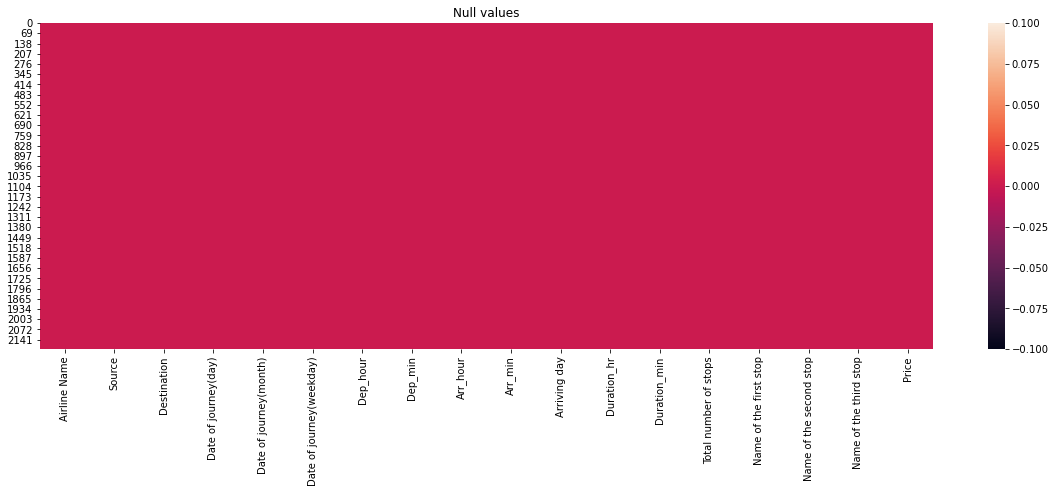

In [244]:
#we'll be using heatmap to see the null values
plt.figure(figsize = [20,6])
sns.heatmap(dataset.isnull())
plt.title('Null values')
plt.show()

##### Observations : In the above heatmap, we can see that no null values are present.

In [245]:
#now we'll do statistical analysis of the dataset which includes both numerical and categorical dataset
dataset.describe(include = 'all')

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price
count,2204,2204,2204,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204,2204.000000,2204.000000,2204.000000,2204,2204,2204,2204.000000
unique,8,10,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,19,3,2,NaN
top,indigo,new delhi,bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,same day,NaN,NaN,NaN,no stop available,no stop available,no stop available,NaN
freq,627,842,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666,NaN,NaN,NaN,2101,2200,2203,NaN
mean,NaN,NaN,NaN,9.472323,10.235481,4.201452,12.643829,24.913793,15.209165,29.198730,NaN,9.567604,27.778584,0.900635,NaN,NaN,NaN,8606.914247
std,NaN,NaN,NaN,6.409300,0.560779,1.957394,5.141370,17.939521,5.754494,17.344091,NaN,7.696729,17.021787,0.617949,NaN,NaN,NaN,3702.512432
min,NaN,NaN,NaN,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,1789.000000
25%,NaN,NaN,NaN,6.000000,10.000000,3.000000,8.000000,10.000000,11.000000,15.000000,NaN,4.000000,15.000000,1.000000,NaN,NaN,NaN,5954.000000
50%,NaN,NaN,NaN,7.000000,10.000000,5.000000,12.000000,25.000000,16.000000,30.000000,NaN,7.000000,30.000000,1.000000,NaN,NaN,NaN,7489.000000
75%,NaN,NaN,NaN,11.000000,10.000000,6.000000,17.000000,40.000000,20.000000,45.000000,NaN,14.000000,45.000000,1.000000,NaN,NaN,NaN,10680.000000


In [103]:
# writing the observations obtained from the statistical summary
print("observations:")
for i in dataset_numerical:
    print("Mean of the ",i,"is :", round(dataset[i].mean(),3))
    print("Median of the ",i,"is :",round(dataset[i].median(),3))
    print("Standard deviation of ",i,"is :" , round(dataset[i].std(),3))
    print("Minimum value of ",i,"is :", round(dataset[i].min(),3))
    print("Maximum value of ",i,"is :", round(dataset[i].max(),3))
    
    x = input('conclusion : \n')
    print("\n\n")

observations:
Mean of the  Date of journey(day) is : 9.472
Median of the  Date of journey(day) is : 7.0
Standard deviation of  Date of journey(day) is : 6.409
Minimum value of  Date of journey(day) is : 2
Maximum value of  Date of journey(day) is : 29
conclusion : 
The mean and median are too small. The mean is slightly larger than mode.The standard deviation of this feature is very low. So, we can assume that data is equally distributed and not much spreaded .Also, there is slight difference between the 75th percentile and maximum value so outliers are not present.



Mean of the  Date of journey(month) is : 10.235
Median of the  Date of journey(month) is : 10.0
Standard deviation of  Date of journey(month) is : 0.561
Minimum value of  Date of journey(month) is : 10
Maximum value of  Date of journey(month) is : 12
conclusion : 
The mean and median are too small and almost equal.The standard deviation of this feature is very low. So, we can assume that data is equally distributed and n

# Getting started with the Univaritate analysis of the numerical Features

In [249]:
dataset_numerical

['Date of journey(day)',
 'Date of journey(month)',
 'Date of journey(weekday)',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Duration_hr',
 'Duration_min',
 'Total number of stops',
 'Price']

### Date of journey(day)

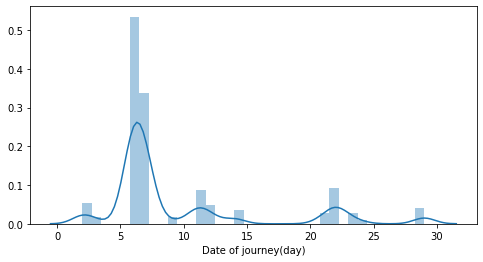

In [246]:
#first using distribution plot
plt.figure(figsize=[8,4])
sns.distplot(dataset["Date of journey(day)"])

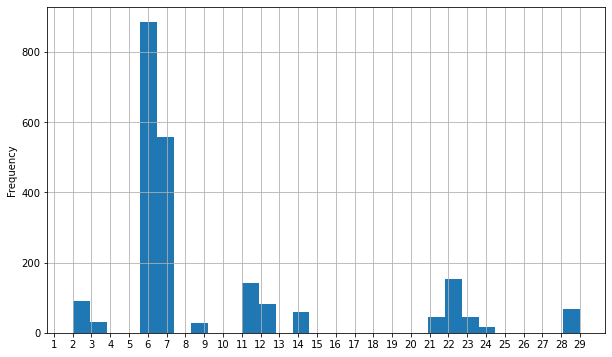

In [100]:
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,30))
dataset["Date of journey(day)"].plot.hist(grid=True, bins=30)

##### Observations : Most of the flights flew between the dates 5 and 7, i.e. around 1300 flights.

### Date of journey(month)

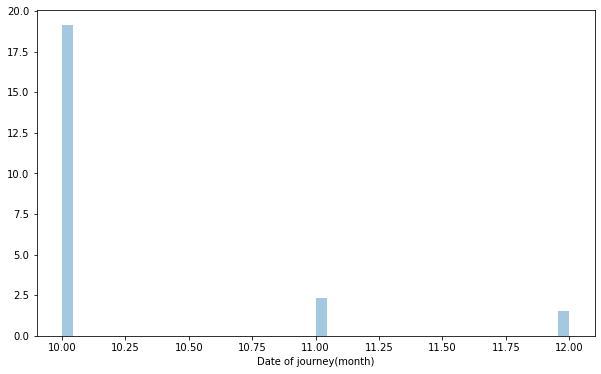

In [255]:
#first using distribution plot
plt.figure(figsize=[10,6])
sns.distplot(dataset["Date of journey(month)"])

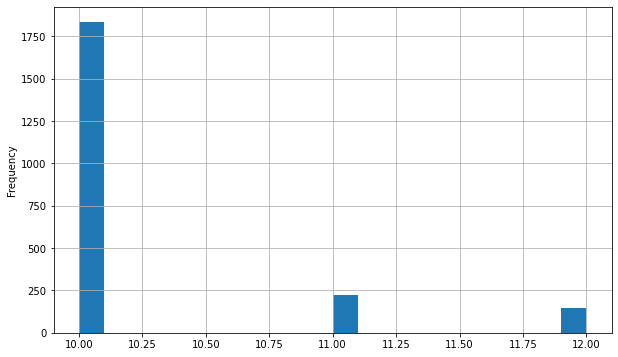

In [253]:
plt.figure(figsize=[10,6])
dataset["Date of journey(month)"].plot.hist(grid=True, bins=20)

##### Observations: In the above distribution plot and histogram we can see that the flight flew between october(10) to december(12).More than 1750 flights flew in the month of october(10).

### Date of journey(weekday)

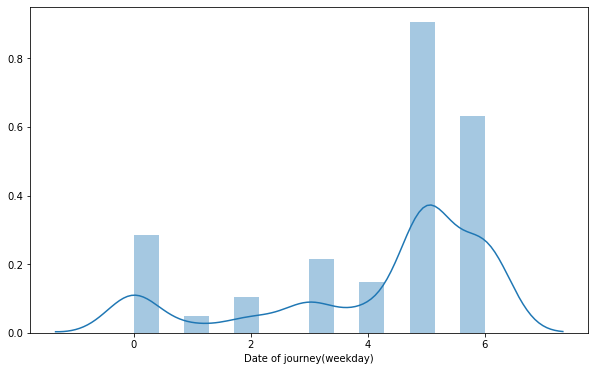

In [256]:
#first using distribution plot
plt.figure(figsize=[10,6])
sns.distplot(dataset["Date of journey(weekday)"])

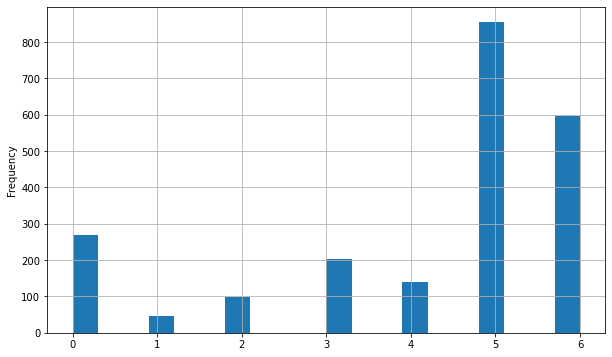

In [257]:
plt.figure(figsize=[10,6])
dataset["Date of journey(weekday)"].plot.hist(grid=True, bins=20)

##### Observations : In the above distribution plot and histogram we can see that the graph attains spike on three days ,i.e, wednesday(5),thursday(6) and friday(0).Also we can see that,more than 800 flight flew on wednesday.

### Dep_hour

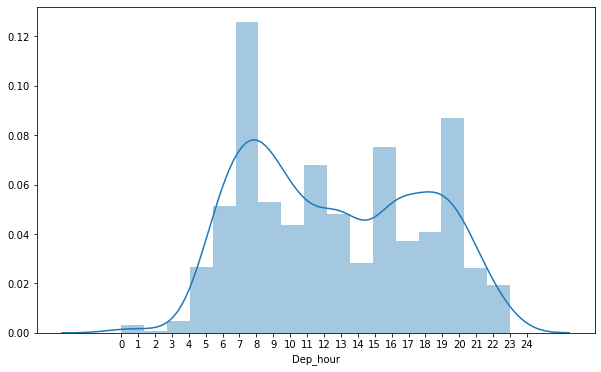

In [281]:
#first using distribution plot
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,25))
sns.distplot(dataset["Dep_hour"])

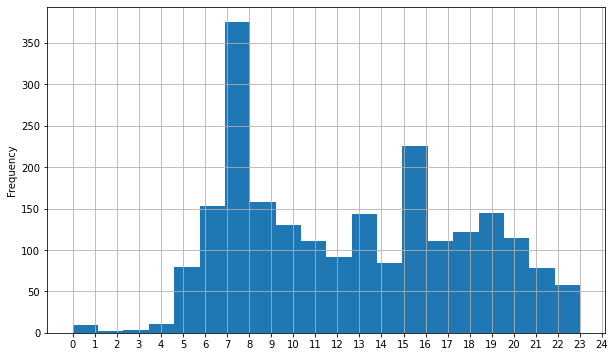

In [277]:
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,30))
dataset["Dep_hour"].plot.hist(grid=True, bins=20)

##### Observations:In the above distribution plot and histogram we can see that the data in the graph is spreaded .Also , the graph attains spike 3 times i.e between 7 to 8 hours(highest) ,13 to 14 hours and 15 to 16 hours.Most of the flights departed from the aiport during these hours.

### Dep_min

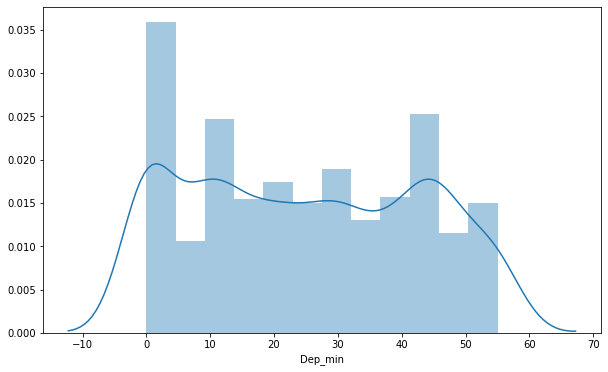

In [282]:
#first using distribution plot
plt.figure(figsize=[10,6])

sns.distplot(dataset["Dep_min"])

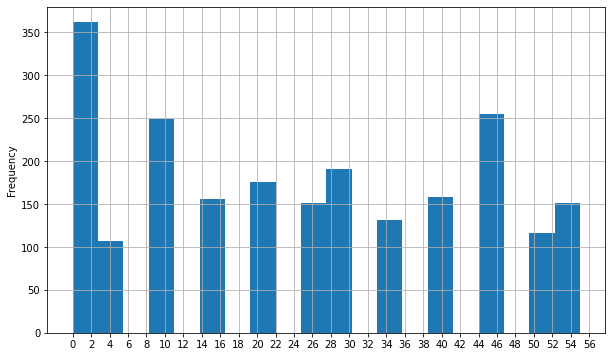

In [289]:
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,70 , step = 2))
dataset["Dep_min"].plot.hist(grid=True, bins=20)

##### Observations: In the above distribution plot and histogram we can see that the data in the graph is spreaded .Also ,the graph attains spike 3 times, i.e.,between 0 to 3(maximum),8 to 11 and 44 to 47.So we can conclude that most of the flights departed either in the first quater of the hour or in the the last.

### Arr_hour

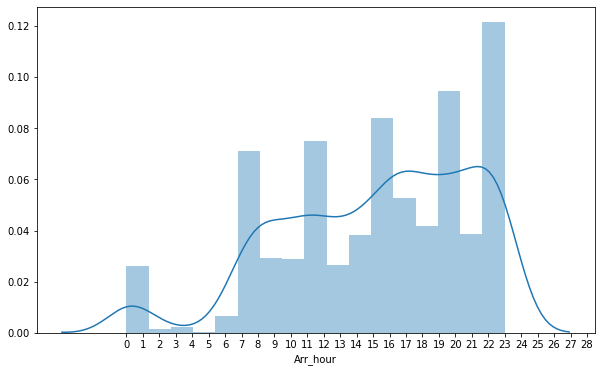

In [291]:
#first using distribution plot
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,30))
sns.distplot(dataset["Arr_hour"])

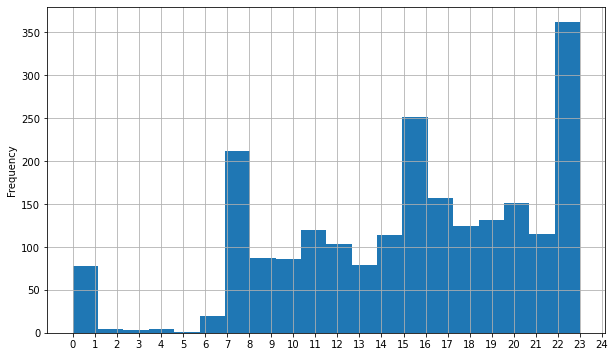

In [294]:
plt.figure(figsize=[10,6])
plt.xticks(np.arange(0,30))
dataset["Arr_hour"].plot.hist(grid=True, bins=20)

##### Observations : In the above distribution plot and histogram we can see that the data in the graph is slightly left skewed .Also ,the graph attains multiple spikes.Most of the flights arrived at the airport between 7 to 8 hours , 15 to 16 hours but maximum number of the flight arrived between 22 to 23 hours(in the night).

### Arr_min

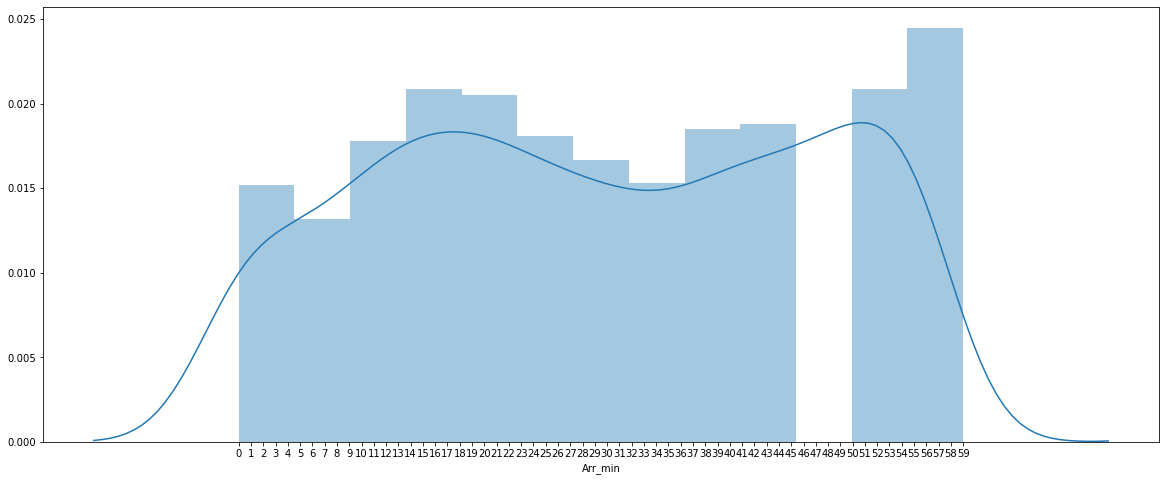

In [303]:
#first using distribution plot
plt.figure(figsize=[20,8])
plt.xticks(np.arange(0,60))
sns.distplot(dataset["Arr_min"])

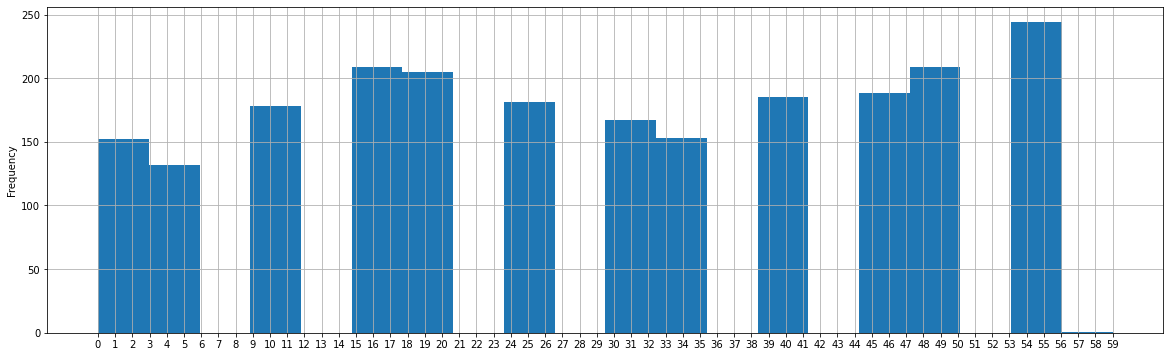

In [104]:
plt.figure(figsize=[20,6])
plt.xticks(np.arange(0,60))
dataset["Arr_min"].plot.hist(grid=True , bins = 20)

##### Observatons :In the above distribution plot and histogram we can see that the data in the graph is spreaded .Also , the graph attains 3 spikes ,i.e., between 0 to 3 min, 15 to 20 min(highest), and 53 to 56 min.Maximum flights arrived at the end of the hour i.e between 53 to 56 min of the hour.

### Duration_hr

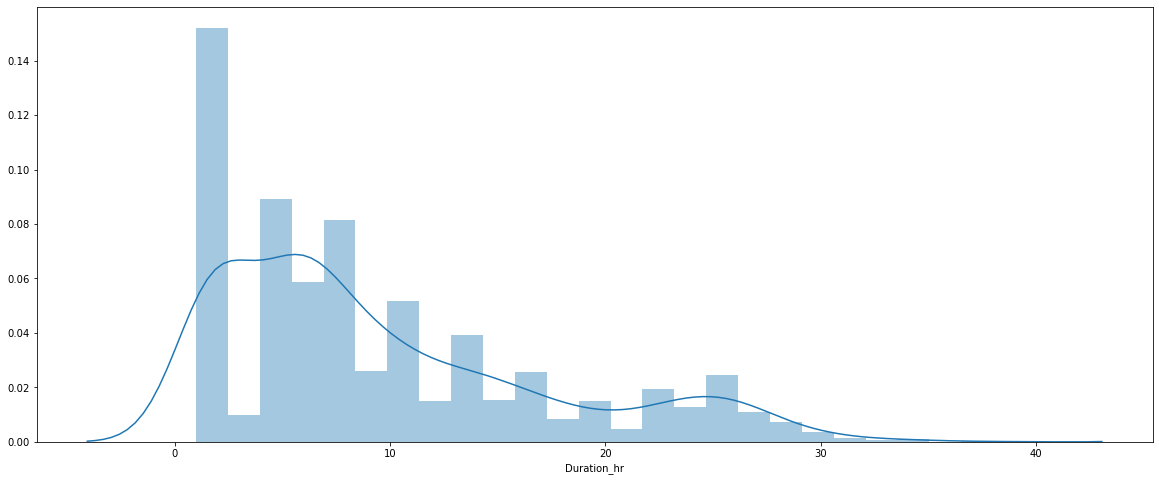

In [314]:
#first using distribution plot
plt.figure(figsize=[20,8])

sns.distplot(dataset["Duration_hr"])

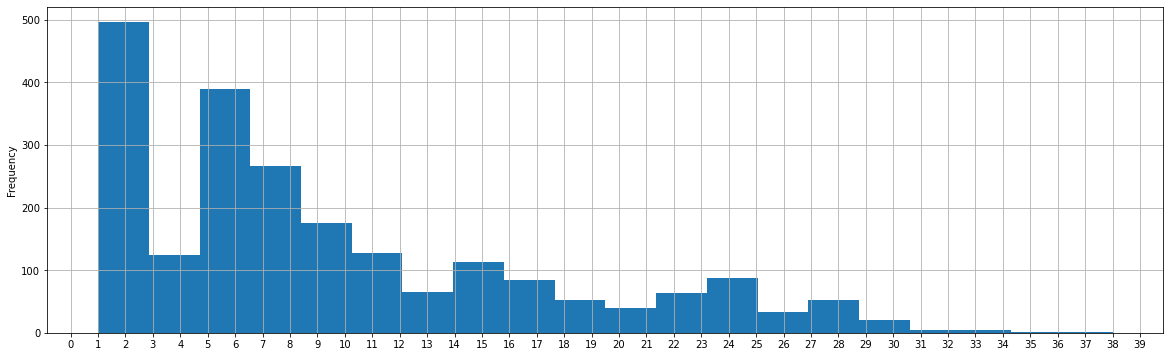

In [327]:
plt.figure(figsize=[20,6])
plt.xticks(np.arange(0,40))
dataset["Duration_hr"].plot.hist(grid=True,bins = 20)

##### Observations :In the above distribution plot and histogram we can see that the data in the graph is right skewed .Also ,the graph attains 2 peaks , i.e., between 1 to 3 and 5 to 7.From the above graphs we can conclude that most of the flights took either 1 to 3 hours to reach their destination or 5 to 7.

### Duration_min

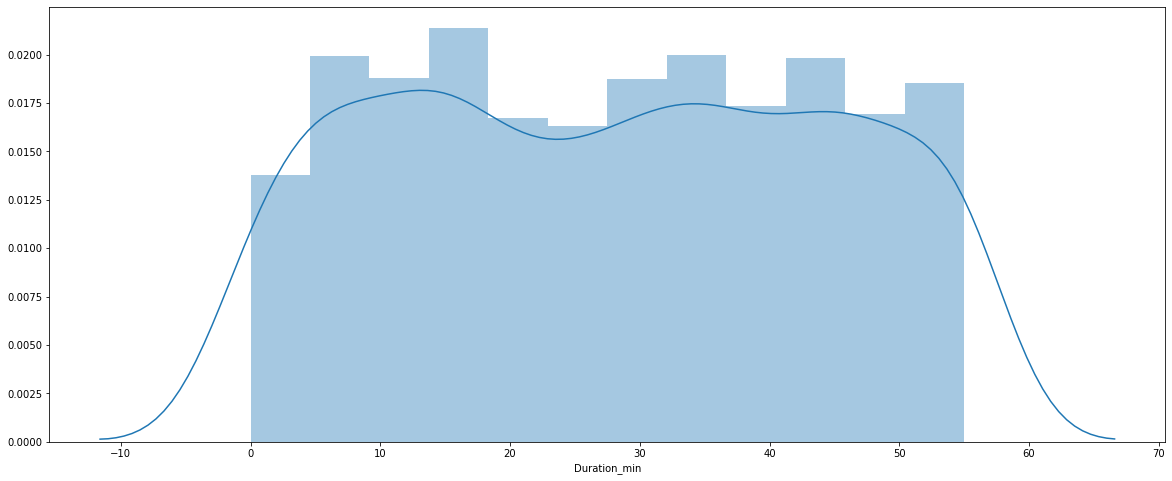

In [105]:
#first using distribution plot
plt.figure(figsize=[20,8])

sns.distplot(dataset["Duration_min"])

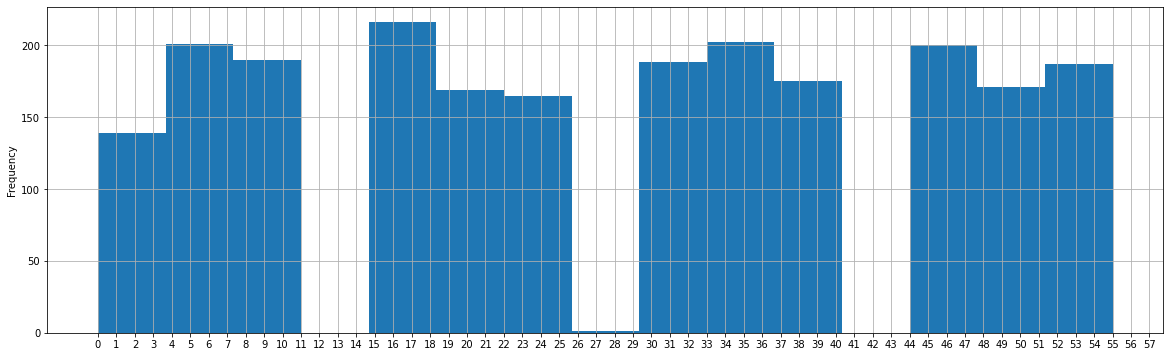

In [337]:
plt.figure(figsize=[20,6])
plt.xticks(np.arange(0,70))
dataset["Duration_min"].plot.hist(grid=True,bins = 15)

##### Observations : In the above distribution plot and histogram we can see that the data in the graph is spreaded .Also ,the graph has multiple peaks between 0 to 55 minutes. 

### Total number of stops

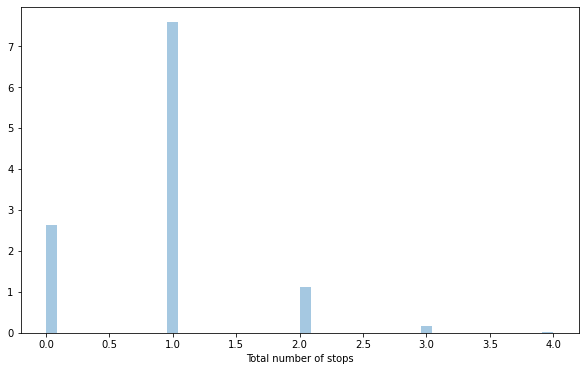

In [340]:
#first using distribution plot
plt.figure(figsize=[10,6])

sns.distplot(dataset["Total number of stops"])

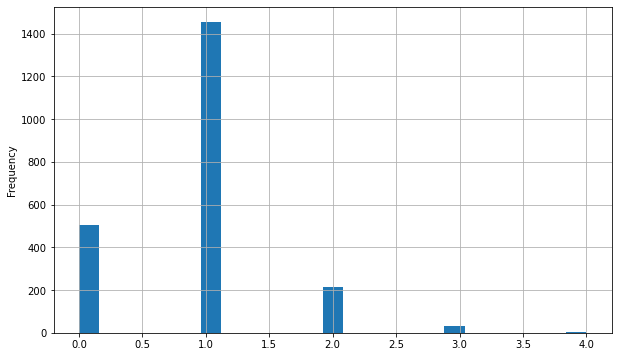

In [345]:
plt.figure(figsize=[10,6])

dataset["Total number of stops"].plot.hist(grid=True,bins = 25)

##### Observations : In the above distribution plot and histogram we can see that the graphs have some fixed values, i.e, between 0 to 4 which indicated the number of stops each flight has before reaching it destination.Most of the flights has 1 stop.

### Price (Target Feature)

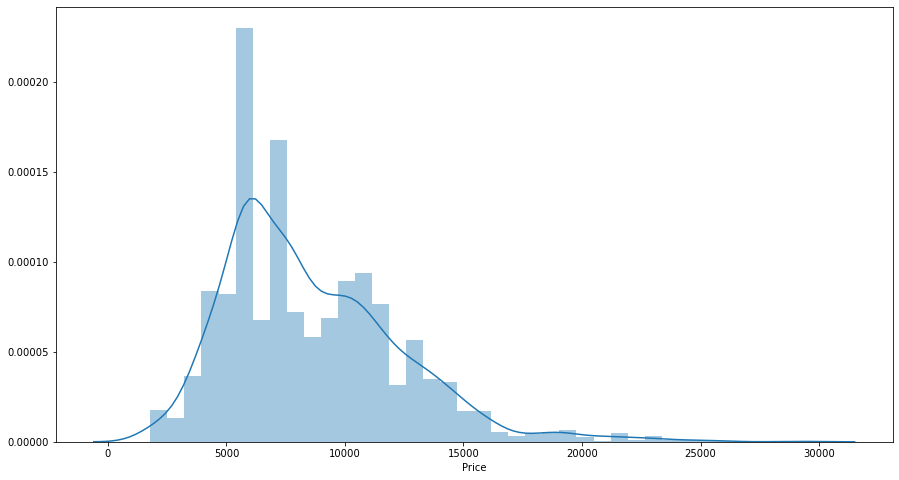

In [350]:
#first using distribution plot
plt.figure(figsize=[15,8])

sns.distplot(dataset["Price"])

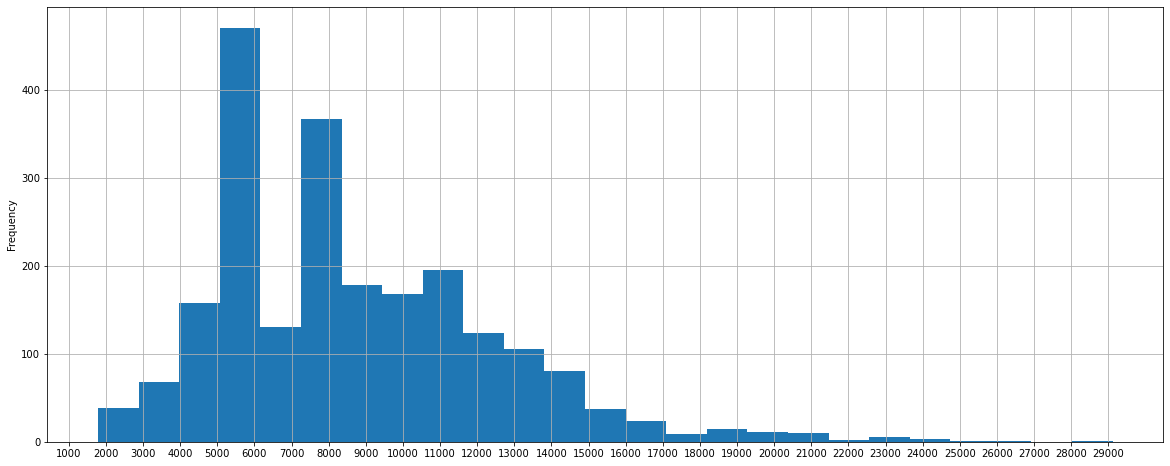

In [108]:
plt.figure(figsize=[20,8])
plt.xticks(np.arange(0,30000 , step = 1000))
dataset["Price"].plot.hist(grid=True,bins = 25)

##### Observations: In the above distribution plot and histogram we can see that the graph is slightly right skewed .Also,the graph attains 3 peaks , i.e. , between rupees 5000 to 6100, 7000 to 8500 and 10500 to 11500.So from here we can conclude that the price of most of the flights ranges either between 5000 to 6100 or 7000 to 8500. 

# Getting started with the Univaritate analysis of the Categorical Features

### Airline Name

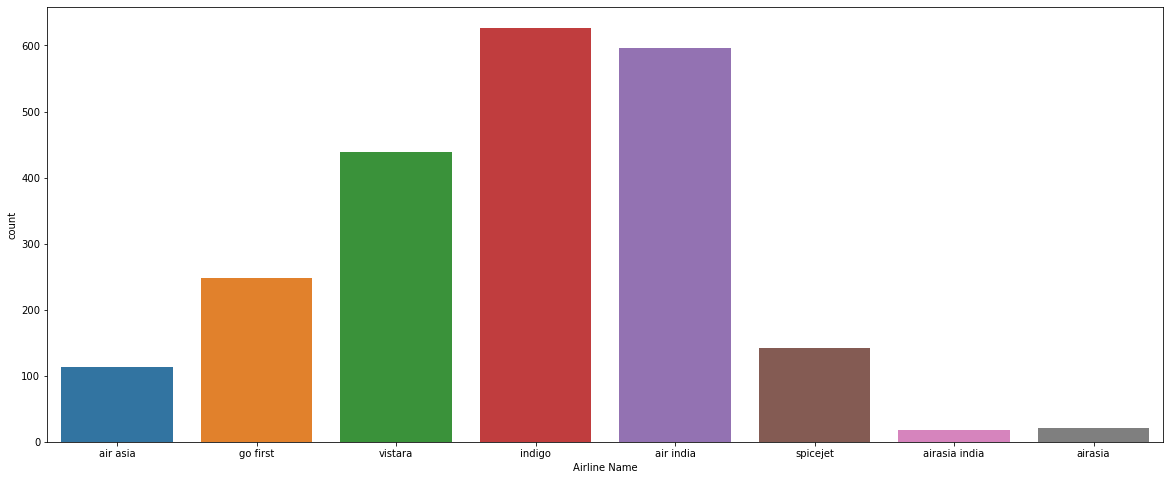

In [358]:
plt.figure(figsize = [20,8])
sns.countplot(dataset['Airline Name'])
plt.show()

In [370]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
print("\n")
print(dataset['Airline Name'].unique())
print("\n")
print("Number of unique values in the feature : ",len(dataset['Airline Name'].unique()))

******** The Unique Values ********


['air asia' 'go first' 'vistara' 'indigo' 'air india' 'spicejet'
 'airasia india' 'airasia']


Number of unique values in the feature :  8


In [361]:
print("********", "Airline Name" ,"********")
dataset['Airline Name'].value_counts()

******** Airline Name ********


indigo           627
air india        596
vistara          439
go first         248
spicejet         142
air asia         113
airasia           21
airasia india     18
Name: Airline Name, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
        1. This attribute contains 8 different flight names.
        2. Indigo flight occurs most of the frequent in this dataset followed by air india and vistara airlines.Here, air asia and airasia are same. 

### Source

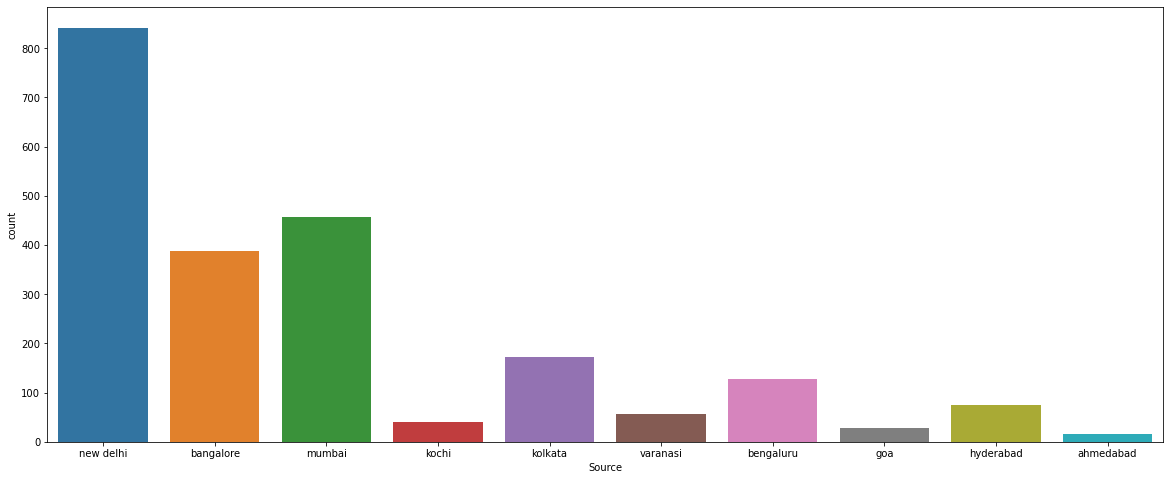

In [362]:
plt.figure(figsize = [20,8])
sns.countplot(dataset['Source'])
plt.show()

In [371]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
print("\n")
print(dataset['Source'].unique())
print("\n")
print("Number of unique values in the feature : ",len(dataset['Source'].unique()))

******** The Unique Values ********


['new delhi' 'bangalore' 'mumbai' 'kochi' 'kolkata' 'varanasi' 'bengaluru'
 'goa' 'hyderabad' 'ahmedabad']


Number of unique values in the feature :  10


In [372]:
print("********", "Source" ,"********")
dataset['Source'].value_counts()

******** Source ********


new delhi    842
mumbai       457
bangalore    387
kolkata      173
bengaluru    128
hyderabad     74
varanasi      57
kochi         41
goa           29
ahmedabad     16
Name: Source, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 10 different sources of the flight.
    2. New Delhi occurs most of the frequent in this dataset followed by Bangalore and then Mumbai .Here,Bengaluru and Bangalore are the same. 

### Destination

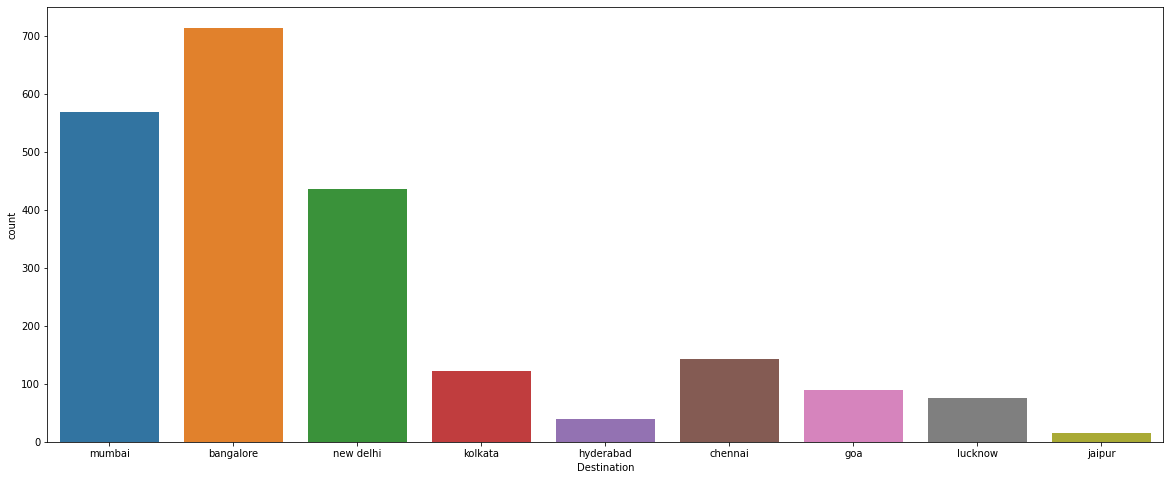

In [374]:
plt.figure(figsize = [20,8])
sns.countplot(dataset['Destination'])
plt.show()

In [378]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
print("\n")
for i in dataset['Destination'].unique():
    print(i)

print("\n")
print("Number of unique values in the feature : ",len(dataset['Destination'].unique()))

******** The Unique Values ********


mumbai
bangalore
new delhi
kolkata
hyderabad
chennai
goa
lucknow
jaipur


Number of unique values in the feature :  9


In [379]:
print("********", "Destination" ,"********")
dataset['Destination'].value_counts()

******** Destination ********


bangalore    714
mumbai       569
new delhi    436
chennai      143
kolkata      122
goa           90
lucknow       75
hyderabad     39
jaipur        16
Name: Destination, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 9 different Destination of the flight.
    2. Bangalore occurs most of the frequent in this dataset followed by Mumbai and New Delhi. 

### Arriving day

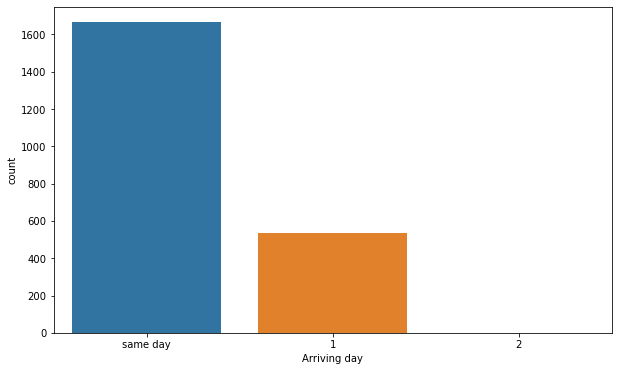

In [383]:
plt.figure(figsize = [10,6])
sns.countplot(dataset['Arriving day'])
plt.show()

In [386]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
for i in dataset['Arriving day'].unique():
    print(i)

print("Number of unique values in the feature : ",len(dataset['Arriving day'].unique()))

******** The Unique Values ********
same day
1
2
Number of unique values in the feature :  3


In [387]:
print("********", "Arriving day" ,"********")
dataset['Arriving day'].value_counts()

******** Arriving day ********


same day    1666
1            537
2              1
Name: Arriving day, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 3 different arriving time.
    2. Most of the flights arrive on the same day of the flight.And only flight takes two days to reach its destination.

### Name of the first stop

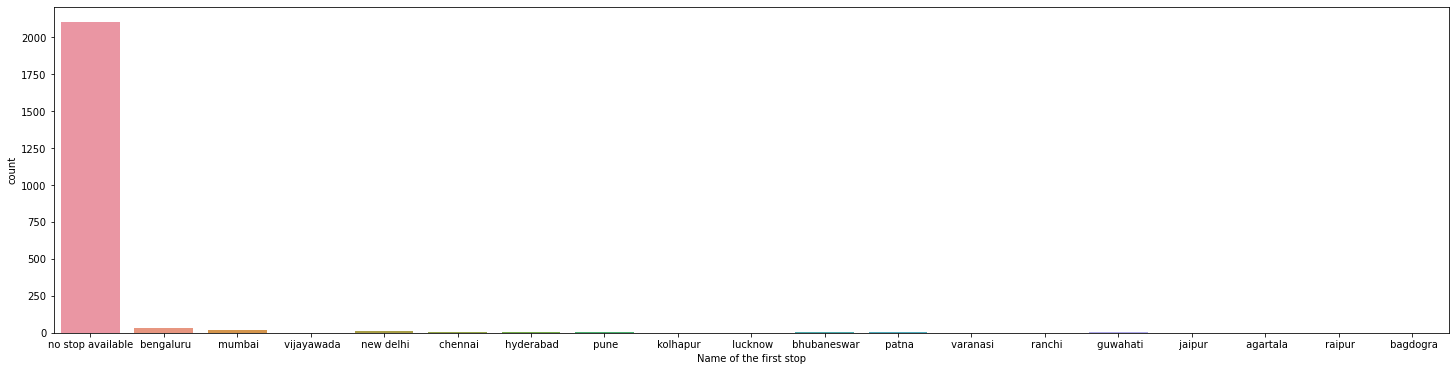

In [390]:
plt.figure(figsize = [25,6])
sns.countplot(dataset['Name of the first stop'])
plt.show()

In [391]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
print("\n")
for i in dataset['Name of the first stop'].unique():
    print(i)
print("\n")
print("Number of unique values in the feature : ",len(dataset['Name of the first stop'].unique()))

******** The Unique Values ********


no stop available
 bengaluru
 mumbai
 vijayawada
 new delhi
 chennai
 hyderabad
 pune
 kolhapur
 lucknow
 bhubaneswar
 patna
 varanasi
 ranchi
 guwahati
 jaipur
 agartala
 raipur
 bagdogra


Number of unique values in the feature :  19


In [392]:
print("********", "Name of the first stop" ,"********")
dataset['Name of the first stop'].value_counts()

******** Name of the first stop ********


no stop available    2101
 bengaluru             32
 mumbai                18
 new delhi              9
 bhubaneswar            7
 pune                   6
 patna                  6
 hyderabad              5
 guwahati               4
 chennai                4
 agartala               2
 bagdogra               2
 lucknow                2
 ranchi                 1
 raipur                 1
 varanasi               1
 jaipur                 1
 vijayawada             1
 kolhapur               1
Name: Name of the first stop, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 19 different first stop of the flights.
    2. Most of the flights do not have any stop between the source and destination.Around 32 flights have first stops as bangaluru.

### Name of the second stop

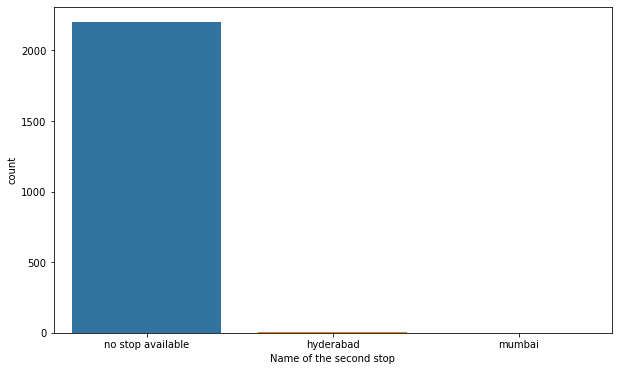

In [395]:
plt.figure(figsize = [10,6])
sns.countplot(dataset['Name of the second stop'])
plt.show()

In [397]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
for i in dataset['Name of the second stop'].unique():
    print(i)
print("Number of unique values in the feature : ",len(dataset['Name of the second stop'].unique()))

******** The Unique Values ********
no stop available
hyderabad
mumbai
Number of unique values in the feature :  3


In [398]:
print("********", "Name of the Second stop" ,"********")
dataset['Name of the second stop'].value_counts()

******** Name of the Second stop ********


no stop available    2200
hyderabad               3
mumbai                  1
Name: Name of the second stop, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 3 different second stop of the flights.
    2. Most of the flights do not have second stop between the source and destination.only 4 flights have second stop.

### Name of the third stop

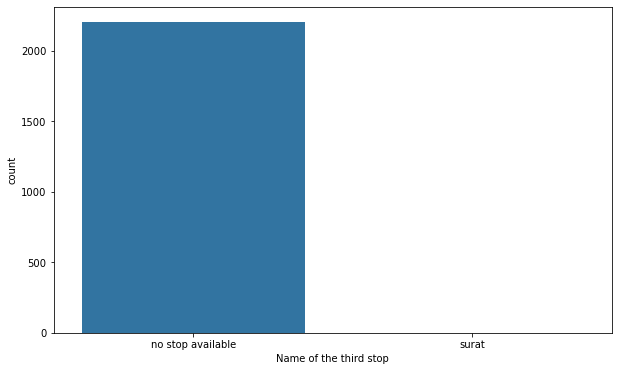

In [399]:
plt.figure(figsize = [10,6])
sns.countplot(dataset['Name of the third stop'])
plt.show()

In [400]:
#here we'll see the unique values of the feature
print("********", "The Unique Values" ,"********")
for i in dataset['Name of the third stop'].unique():
    print(i)
print("Number of unique values in the feature : ",len(dataset['Name of the third stop'].unique()))

******** The Unique Values ********
no stop available
surat
Number of unique values in the feature :  2


In [401]:
print("********", "Name of the third stop" ,"********")
dataset['Name of the third stop'].value_counts()

******** Name of the third stop ********


no stop available    2203
surat                   1
Name: Name of the third stop, dtype: int64

##### Observations : From the above count plot and information we made following conclusion:
    1. This attribute contains 2 different third stop of the flights.
    2. Most of the flights do not have any stop between the source and destination.only 1 flight has a third stop.

### Using pairplots to see relationship between the attributes

<Figure size 1080x432 with 0 Axes>

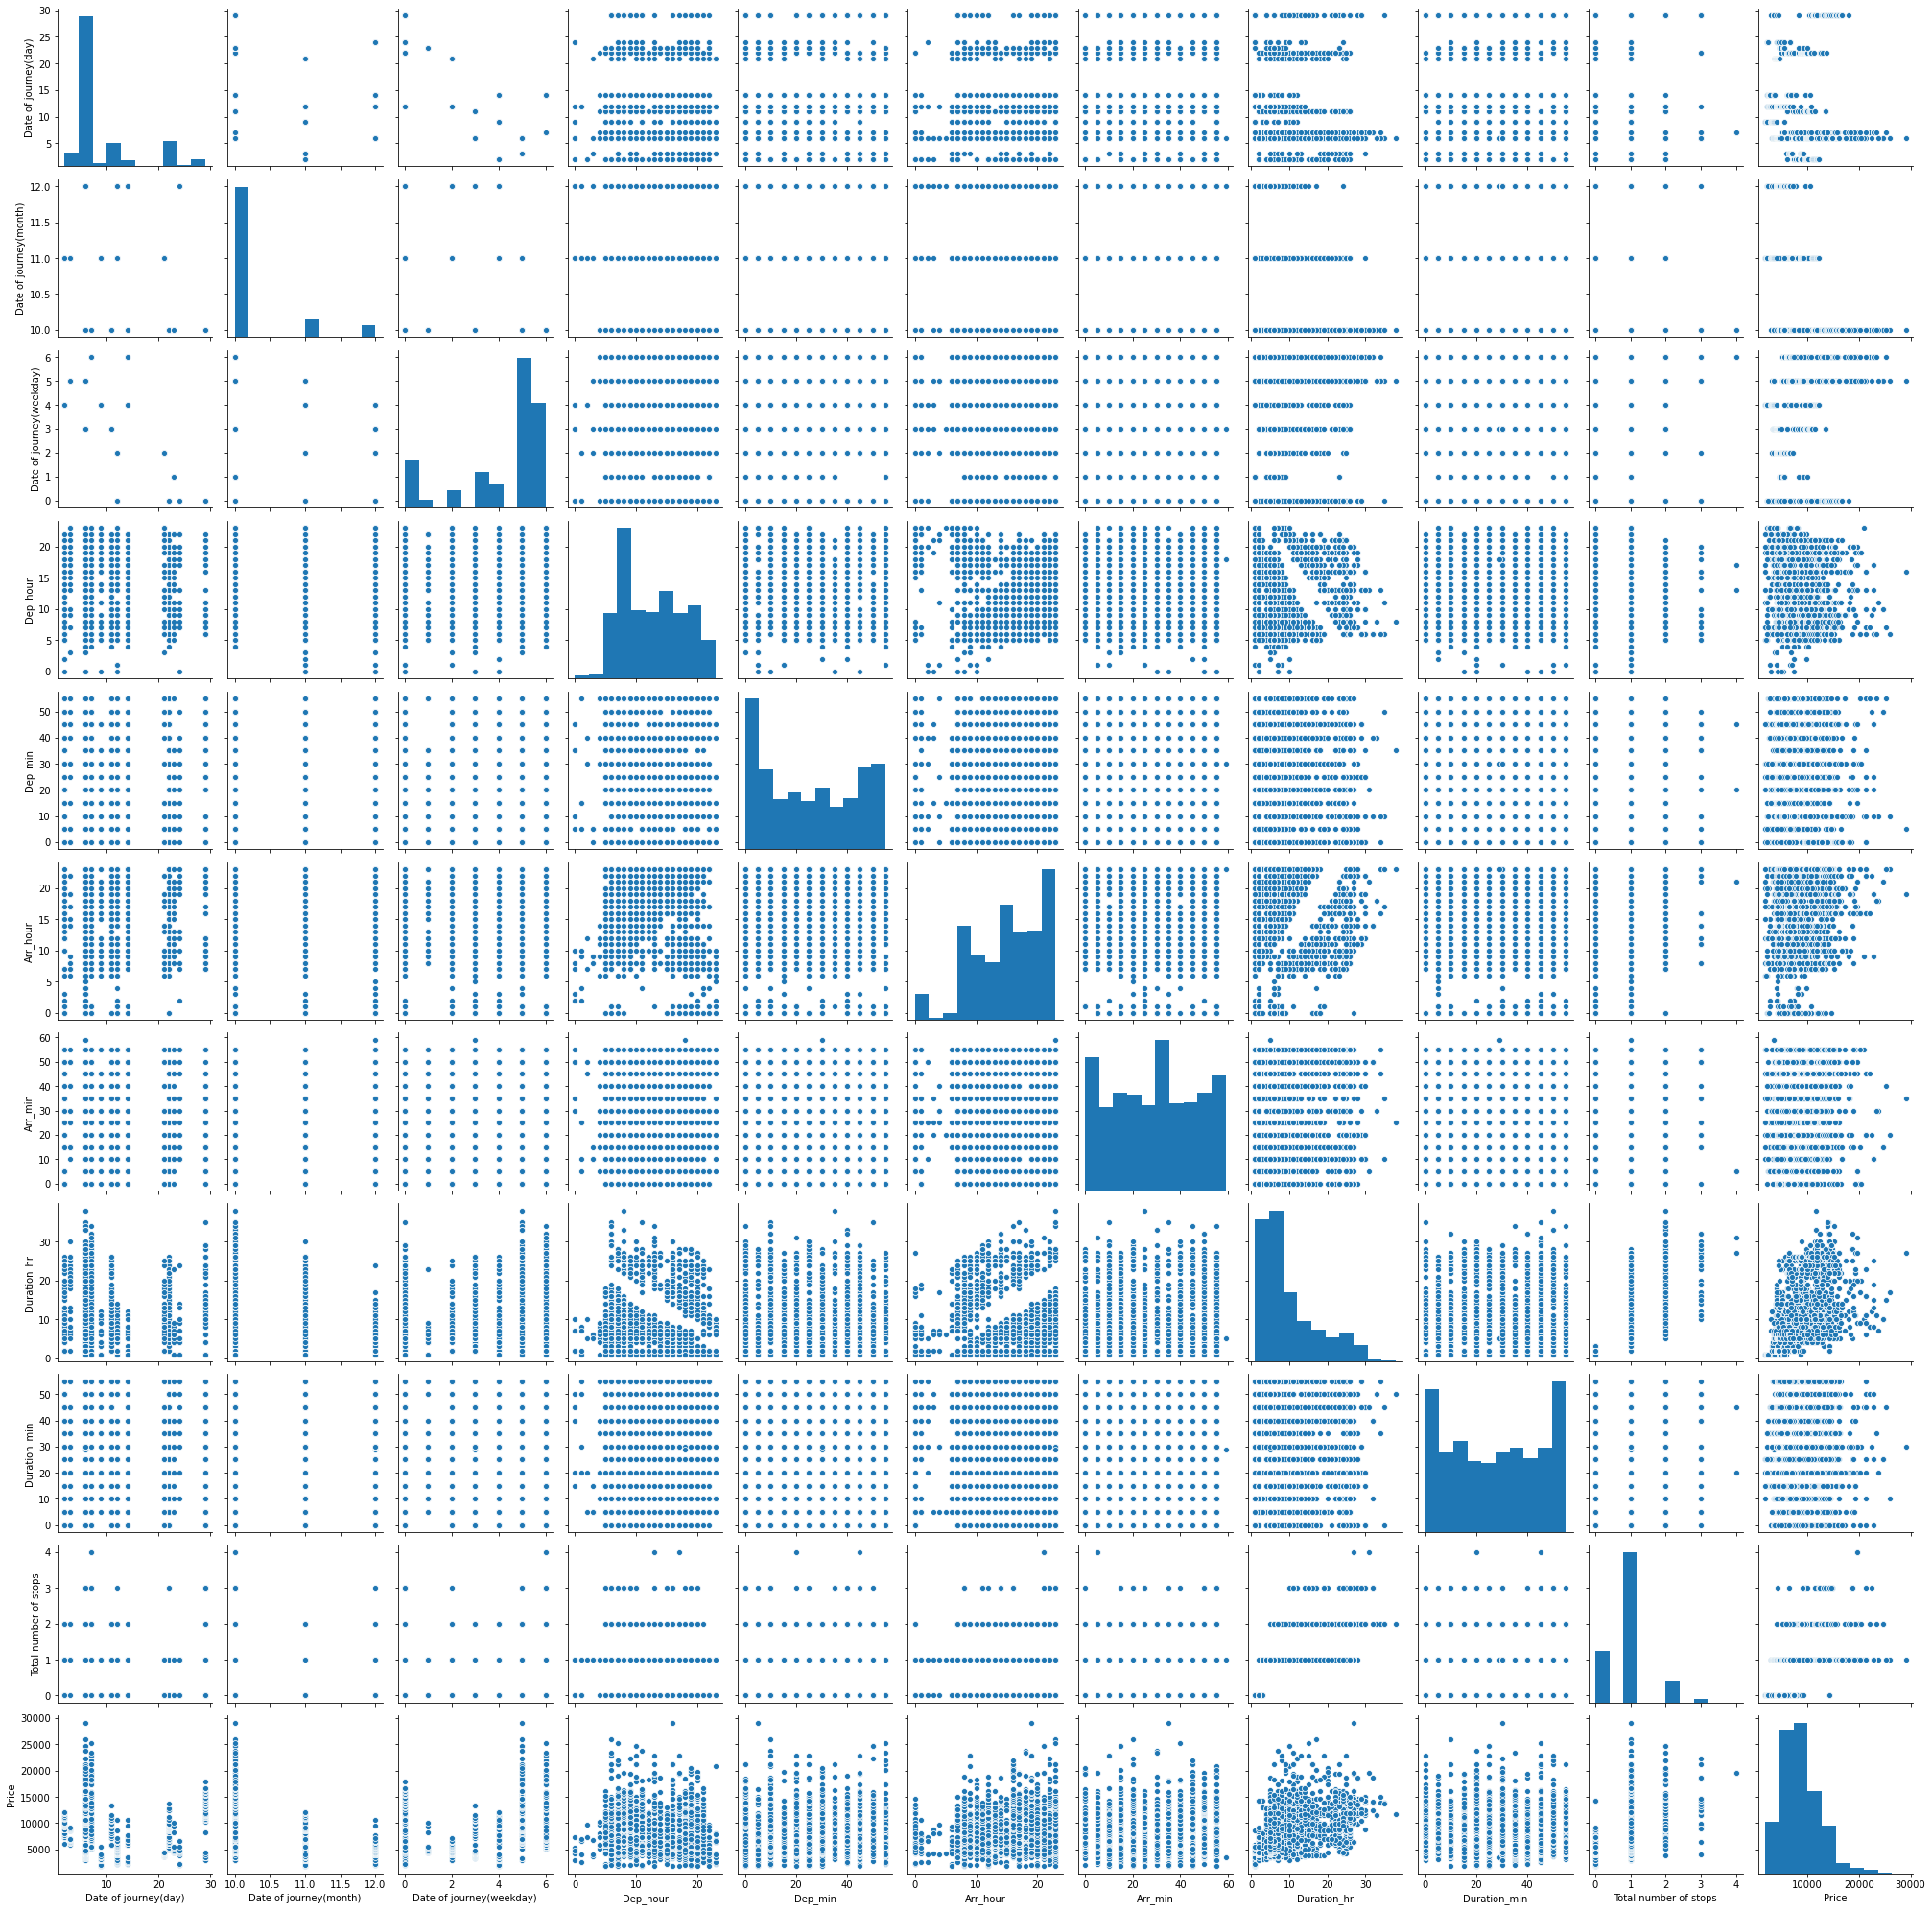

In [402]:
#pairplot
plt.figure(figsize = [15,6])
sns.pairplot(dataset)

##### Not much insights can be developed from the above scatter plot and histogram.

In [13]:
#Lets use ordinal encoder for encoding the categorical features and then we'll go for bi variant analysis
dataset_encoder = dataset.copy() #created a seperate dataset to encode the data

In [404]:
dataset_encoder.head()

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price
0,air asia,new delhi,mumbai,6,10,5,12,40,20,15,same day,7,35,1,no stop available,no stop available,no stop available,5953
1,air asia,new delhi,mumbai,6,10,5,11,55,20,15,same day,8,20,1,no stop available,no stop available,no stop available,5953
2,air asia,new delhi,mumbai,6,10,5,8,0,16,35,same day,8,35,1,no stop available,no stop available,no stop available,5953
3,air asia,new delhi,mumbai,6,10,5,4,55,14,15,same day,9,20,1,no stop available,no stop available,no stop available,5953
4,air asia,new delhi,mumbai,6,10,5,5,20,20,15,same day,14,55,1,no stop available,no stop available,no stop available,5953


In [21]:
#using ordinal encoder to encode categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in dataset_categorical:
    dataset_encoder[i] = oe.fit_transform(dataset_encoder[[i]])

In [407]:
#lets use the correlation matrix to see the correlation between the features
corr_matrix =dataset_encoder.corr()
corr_matrix

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Name of the first stop,Name of the second stop,Name of the third stop,Price
Airline Name,1.000000,0.002979,-0.001057,0.005489,0.044648,0.003468,0.049881,0.143493,0.044823,0.063565,0.172518,-0.242773,-0.042525,-0.309757,-0.020239,0.051742,-0.026635,-0.073151
Source,0.002979,1.000000,-0.239511,-0.032636,-0.091357,0.025052,0.052653,-0.030215,0.039420,-0.002134,0.001273,-0.053998,-0.034892,-0.093385,0.141759,0.013557,0.001759,-0.136122
Destination,-0.001057,-0.239511,1.000000,0.086116,0.231350,-0.299906,-0.022581,0.048232,-0.036575,-0.121430,0.063692,-0.106632,-0.074952,-0.129756,-0.022055,-0.047364,0.024381,-0.206449
Date of journey(day),0.005489,-0.032636,0.086116,1.000000,0.027262,-0.830012,0.016224,0.023311,-0.000723,-0.097197,0.137375,-0.051851,-0.066341,-0.081208,-0.156149,-0.005254,0.008404,-0.164779
Date of journey(month),0.044648,-0.091357,0.231350,0.027262,1.000000,-0.305420,0.035873,-0.041298,-0.093339,0.023282,0.238607,-0.181478,0.058060,-0.178710,-0.371998,-0.130264,0.067054,-0.378344
Date of journey(weekday),0.003468,0.025052,-0.299906,-0.830012,-0.305420,1.000000,-0.002069,-0.021093,0.039378,0.100237,-0.200220,0.123021,0.059909,0.156161,0.219248,0.040518,-0.023967,0.287385
Dep_hour,0.049881,0.052653,-0.022581,0.016224,0.035873,-0.002069,1.000000,0.015022,0.032698,-0.046776,-0.386344,0.057006,0.020027,-0.091583,-0.018974,0.010936,-0.015103,-0.024870
Dep_min,0.143493,-0.030215,0.048232,0.023311,-0.041298,-0.021093,0.015022,1.000000,0.030559,0.005789,0.063270,-0.077543,-0.033970,-0.052366,0.045057,0.034417,-0.017716,0.005847
Arr_hour,0.044823,0.039420,-0.036575,-0.000723,-0.093339,0.039378,0.032698,0.030559,1.000000,-0.032626,0.385594,-0.024963,0.029780,0.081162,0.005675,-0.007745,0.021445,0.099593
Arr_min,0.063565,-0.002134,-0.121430,-0.097197,0.023282,0.100237,-0.046776,0.005789,-0.032626,1.000000,0.008644,0.030404,0.050774,0.054403,0.033904,0.001497,-0.035876,0.067952


Text(0.5, 1.0, 'Correlationship between flight attributes')

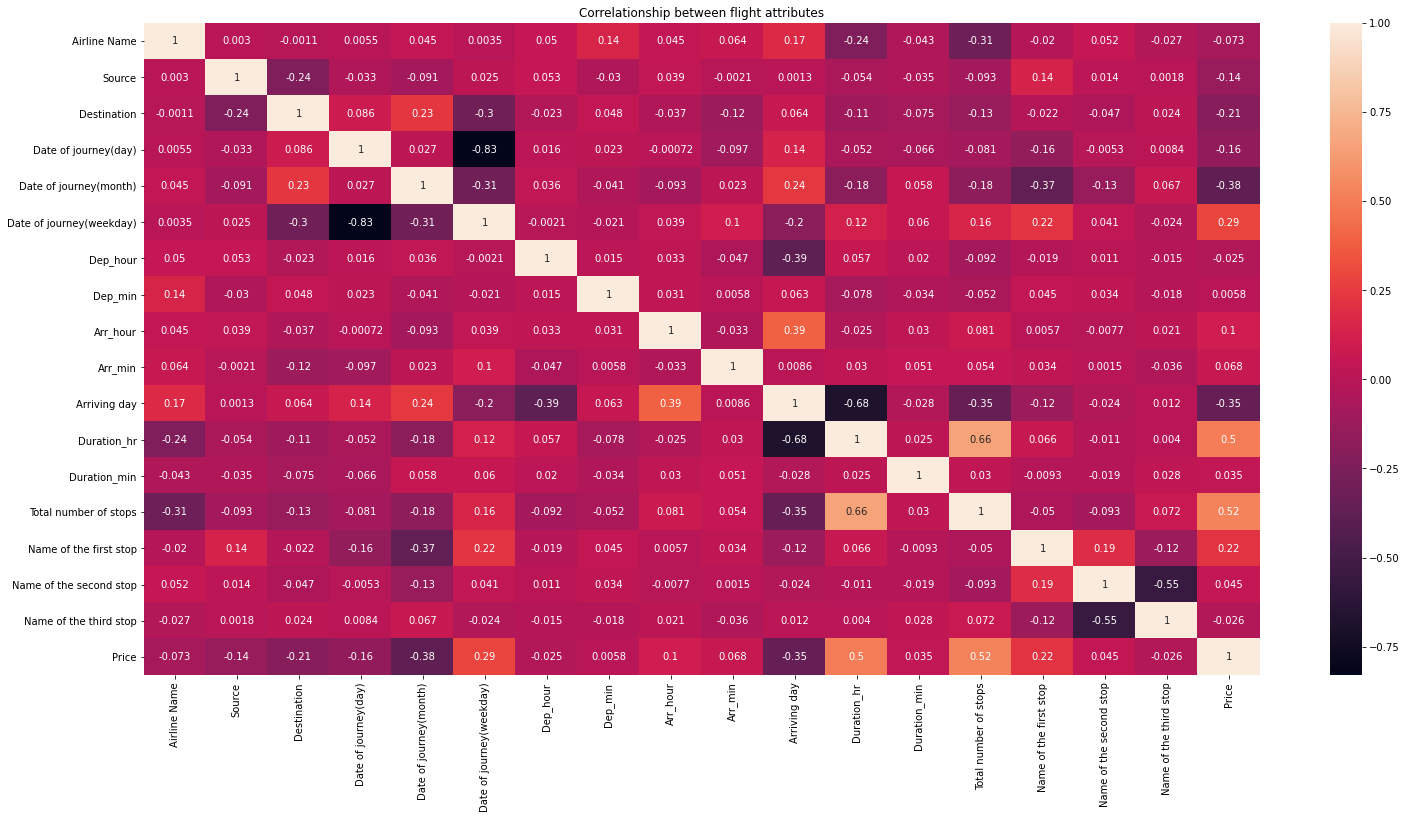

In [123]:
#using heatmap to see the correlation
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(dataset_encoder.corr(),annot = True)
plt.title('Correlationship between flight attributes')

##### Observations: In the above heatmap we observed that:
1. Source and destinations are shows a negative correlation with each other means, if one increases other decreases and  vice versa.
2. Airline name and Dep_hour , Airline name and Arriving day shows positive correlation with each other, if one increases other also increases.
3. Airline name and Duration_hr, Airline name and Total number of stops shows negative correlation with each other.
4. Destination and Date of journey(weekdays), Destination and Price shows negative correlation with each other.
5. Date of journey (day) and date of journey(weekdays) , Duration_hr and Arriving day are highly negative correlated to each other. 
6. Arriving day and Arr_hour,Total number of stops and duration_hr,Price and Duration_hr,price and total number of stops are more positively correlated to each other as compared to other features.

In [410]:
#using correlation matrix to see the relationship of each attribute with the target feature.

In [411]:
corr_matrix['Price'].sort_values(ascending = False)

Price                       1.000000
Total number of stops       0.521750
Duration_hr                 0.504387
Date of journey(weekday)    0.287385
Name of the first stop      0.219626
Arr_hour                    0.099593
Arr_min                     0.067952
Name of the second stop     0.045106
Duration_min                0.035240
Dep_min                     0.005847
Dep_hour                   -0.024870
Name of the third stop     -0.025687
Airline Name               -0.073151
Source                     -0.136122
Date of journey(day)       -0.164779
Destination                -0.206449
Arriving day               -0.345122
Date of journey(month)     -0.378344
Name: Price, dtype: float64

#### Observations:
As we saw the relationship of Price with other attributes ,earlier in the heatmap.Total number of stops,Duration_hr,Date of journey(weekday),Name of the first stop shows positive correlation with Price attribute.Whereas, Destination,Arriving day and Date of journey(month) shows negative correlation with Price attribute. 

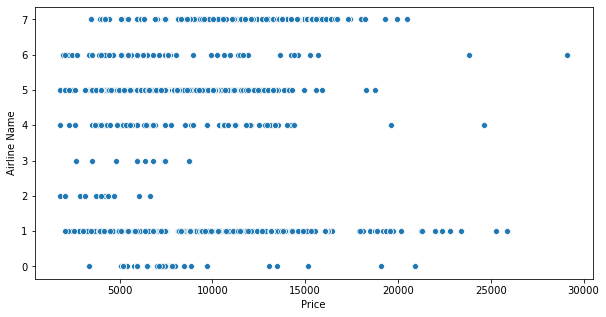

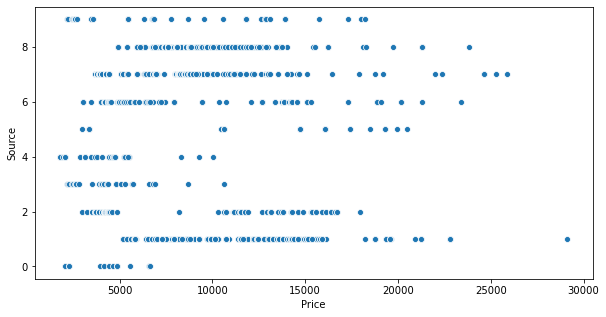

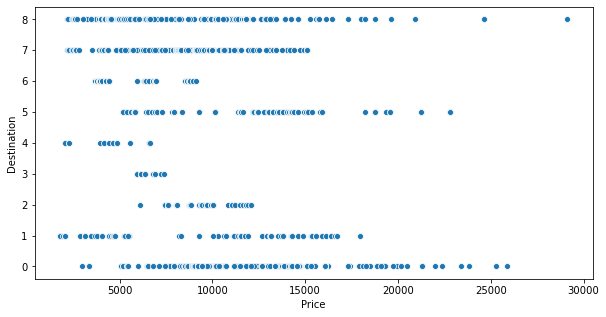

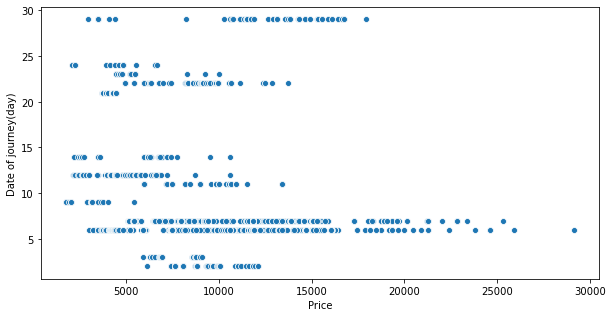

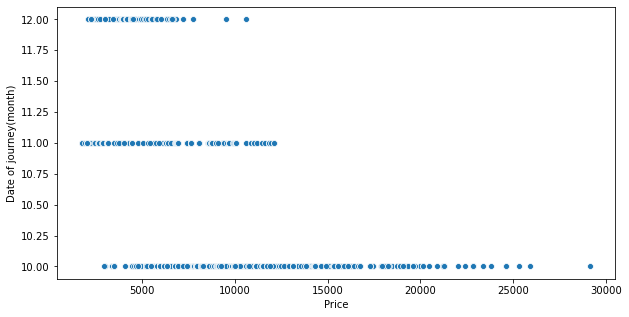

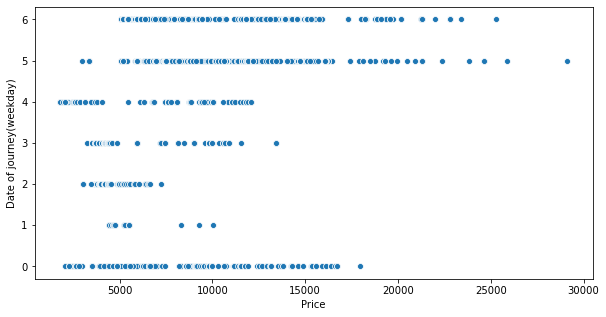

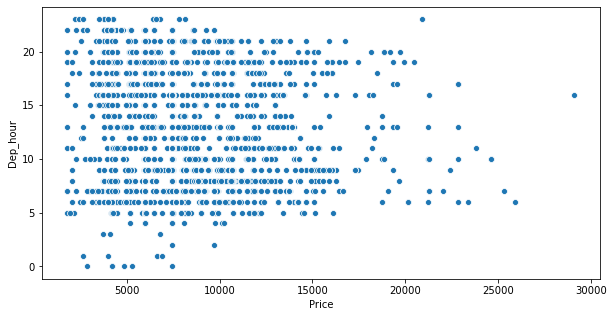

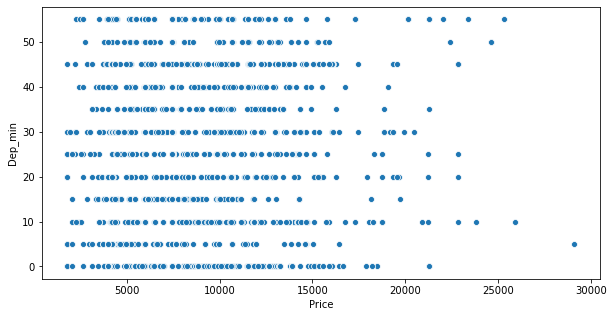

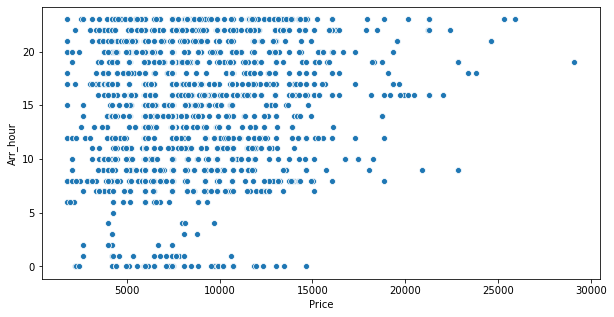

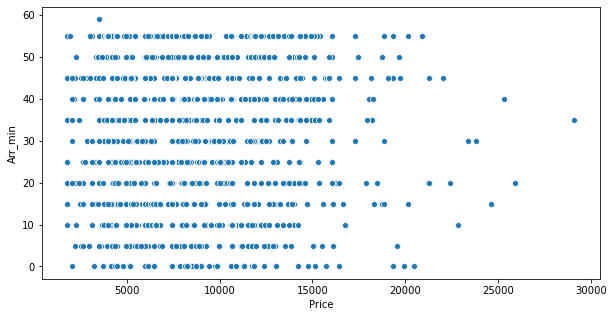

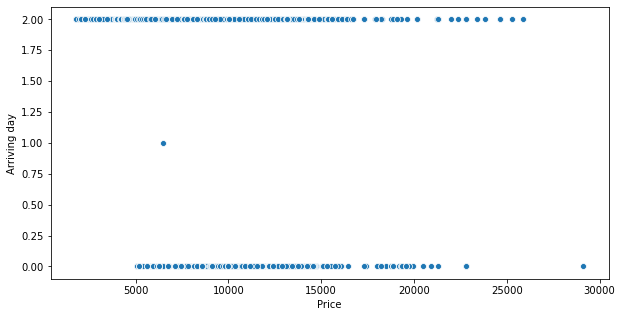

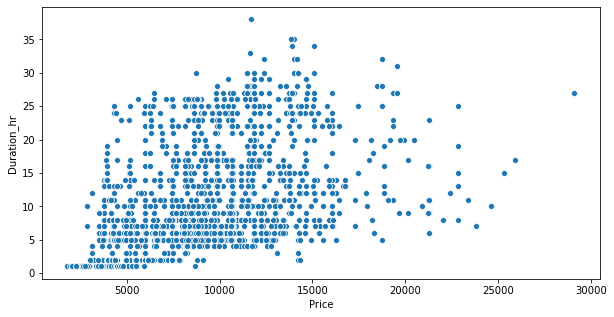

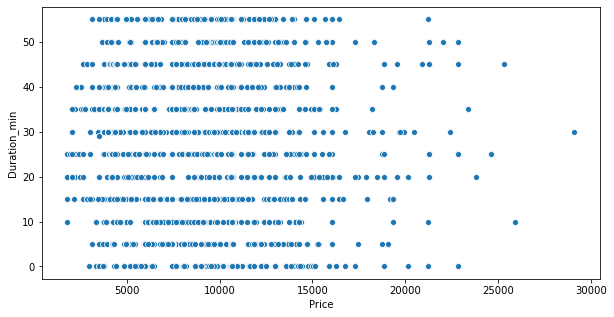

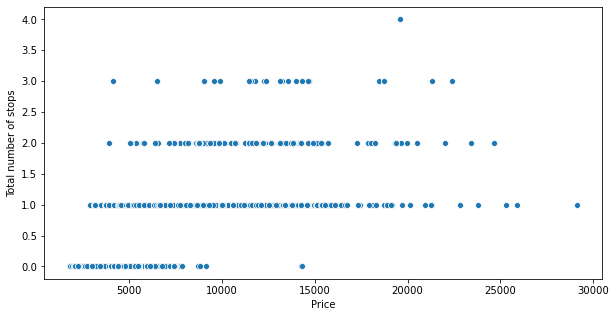

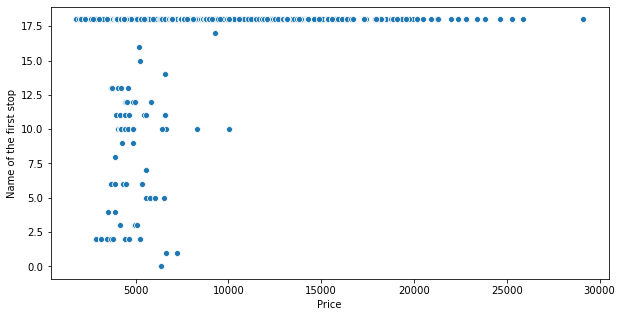

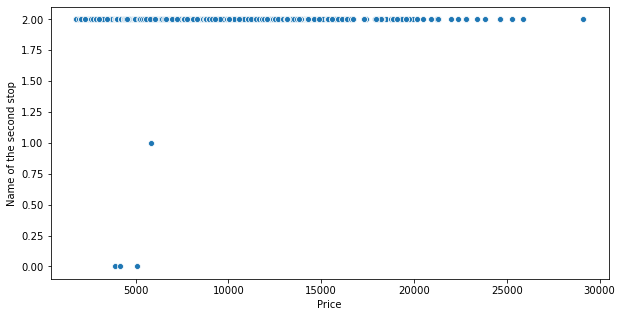

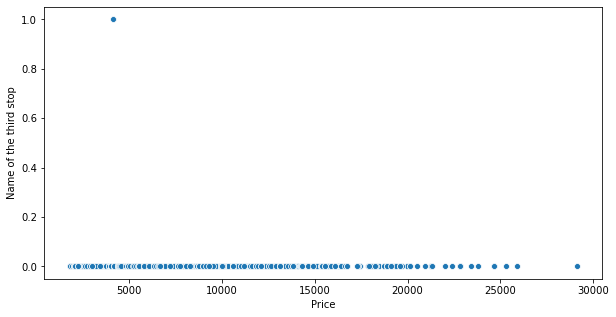

In [125]:
#analysing the relationship of the target feature with other features

#FlightPrice

Price_feature_relation = dataset_encoder.drop(['Price'],axis = 1)

for i in Price_feature_relation:
    plt.figure(figsize = [10,5])
    x = dataset_encoder['Price']
    y = dataset_encoder[i]
    plt.xlabel('Flight Price')
    plt.ylabel(i)
    sns.scatterplot(x,y)
    plt.show()

##### Observations:In the above scatterplot we observed that
1. Flight prices ranges from 5000 to 25000 between the dates 5 to 7.Flight prices are fewer between the dates 11 to 25.Also,Prices are low on 29th but also has most of the values between 10000 to 20000.
2. Flight price ranges from less than 5000 to 29000 in the month of october(10),Lowest in the month of december(12).
3. Flight prices ranges from less than 5000 to around 15000 on friday(0). flight price are highest on wednesday(5) and thursday(6). and lowest on Tuesday(4).
4. Flight prices are minimum when there are no stops.The prices vary hugely for 1 stop.
5. Flight price increases when the duration(Duration_hr) of the flight increases.

In [412]:
#Using boxplot to plot outliers

In [413]:
dataset_numerical

['Date of journey(day)',
 'Date of journey(month)',
 'Date of journey(weekday)',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Duration_hr',
 'Duration_min',
 'Total number of stops',
 'Price']

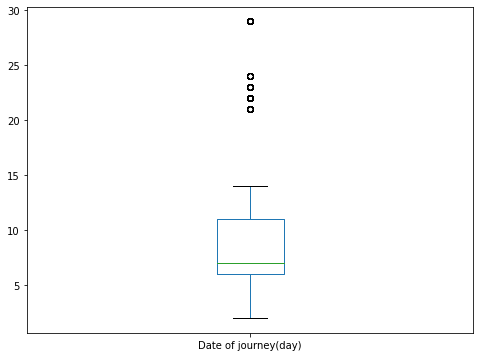

In [414]:
#Date of journey(day)
plt.figure(figsize = [8,6])
dataset['Date of journey(day)'].plot.box()

##### Observations : In the above box plot we can see that some outliers are present far from the upper whisker.

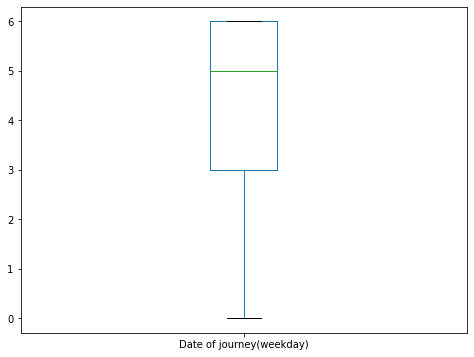

In [416]:
#Date of journey(weekday)
plt.figure(figsize = [8,6])
dataset['Date of journey(weekday)'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

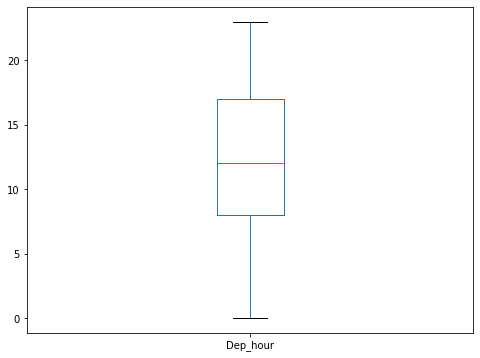

In [417]:
#Dep_hour
plt.figure(figsize = [8,6])
dataset['Dep_hour'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

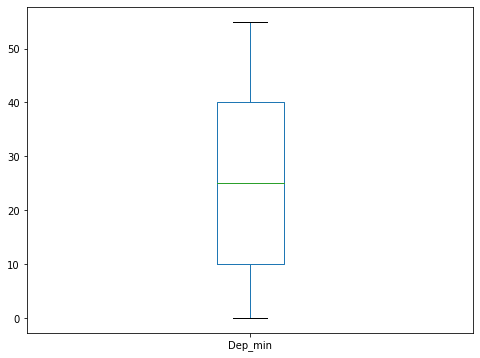

In [418]:
#Dep_min
plt.figure(figsize = [8,6])
dataset['Dep_min'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

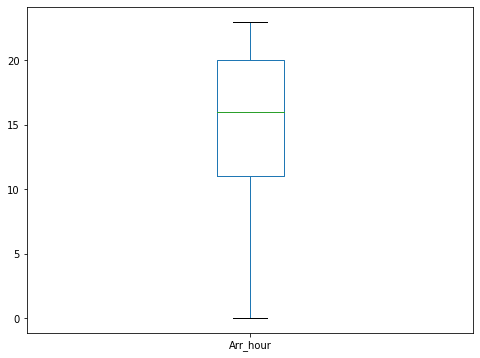

In [419]:
#Arr_hour
plt.figure(figsize = [8,6])
dataset['Arr_hour'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

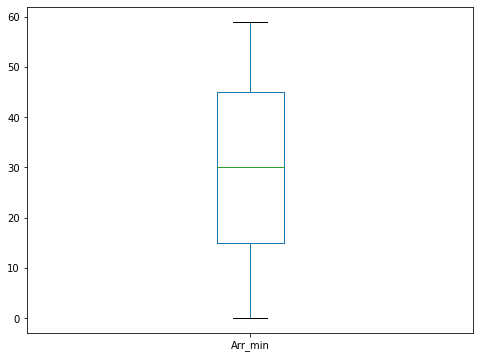

In [420]:
#Arr_min
plt.figure(figsize = [8,6])
dataset['Arr_min'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

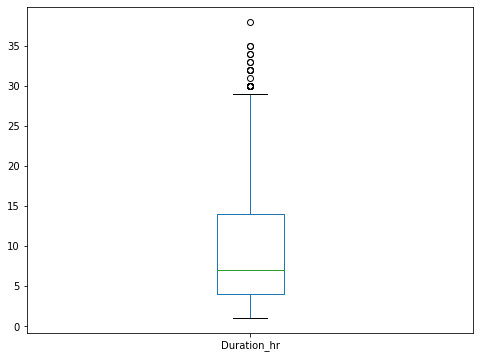

In [421]:
#Duration_hr
plt.figure(figsize = [8,6])
dataset['Duration_hr'].plot.box()

##### Observations : In the above box plot we can see that some outliers are present near the upper whisker.

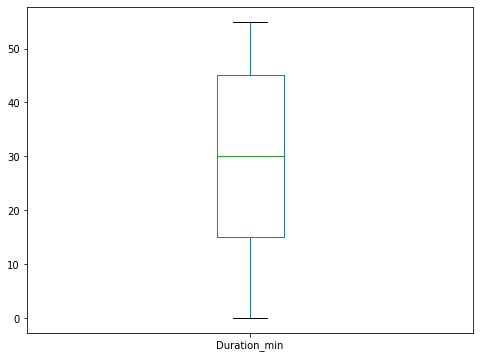

In [422]:
#Duration_min
plt.figure(figsize = [8,6])
dataset['Duration_min'].plot.box()

##### Observations : In the above box plot we can see that no outlier is present in this attribute.

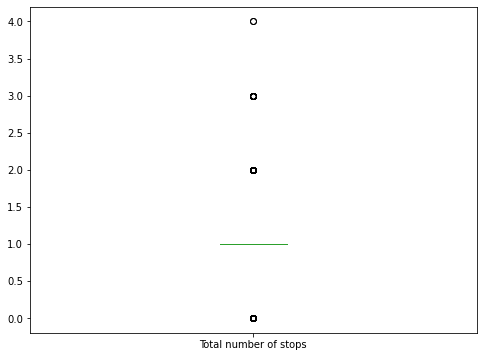

In [423]:
#Total number of stops
plt.figure(figsize = [8,6])
dataset['Total number of stops'].plot.box()

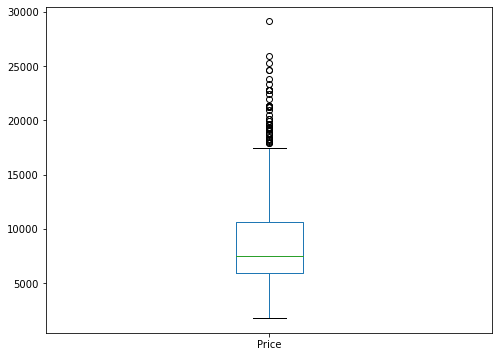

In [424]:
#Price
plt.figure(figsize = [8,6])
dataset['Price'].plot.box()

##### Observations : In the above box plot we can see that lots of outliers are present near the upper whisker and far from the upper whisker.

In [ ]:
#Final encoding the dataset

In [14]:
dataset4 = dataset.copy()

In [15]:
#first we we'll drop all those columns which do not have much information.
dataset4 = dataset4.drop(['Name of the second stop' , 'Name of the third stop'], axis = 1 )


In [16]:
# As Airline is Nominal Categorical data, we will perform OneHotEncoder

Airline = dataset4[["Airline Name"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head()

,Airline Name_air india,Airline Name_airasia,Airline Name_airasia india,Airline Name_go first,Airline Name_indigo,Airline Name_spicejet,Airline Name_vistara
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [17]:
#source
Source =dataset4[["Source"]]
Source =pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_bangalore,Source_bengaluru,Source_goa,Source_hyderabad,Source_kochi,Source_kolkata,Source_mumbai,Source_new delhi,Source_varanasi
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [18]:
# As Destination is Nominal categorical data, we will perform OneHotEncoding 

Destination =dataset4[["Destination"]]

Destination =pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_chennai,Destination_goa,Destination_hyderabad,Destination_jaipur,Destination_kolkata,Destination_lucknow,Destination_mumbai,Destination_new delhi
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [19]:
dataset4 =pd.concat([dataset4,Airline,Source,Destination], axis=1)
dataset4.head()

,Airline Name,Source,Destination,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,...,Source_new delhi,Source_varanasi,Destination_chennai,Destination_goa,Destination_hyderabad,Destination_jaipur,Destination_kolkata,Destination_lucknow,Destination_mumbai,Destination_new delhi
0,air asia,new delhi,mumbai,6,10,5,12,40,20,15,...,1,0,0,0,0,0,0,0,1,0
1,air asia,new delhi,mumbai,6,10,5,11,55,20,15,...,1,0,0,0,0,0,0,0,1,0
2,air asia,new delhi,mumbai,6,10,5,8,0,16,35,...,1,0,0,0,0,0,0,0,1,0
3,air asia,new delhi,mumbai,6,10,5,4,55,14,15,...,1,0,0,0,0,0,0,0,1,0
4,air asia,new delhi,mumbai,6,10,5,5,20,20,15,...,1,0,0,0,0,0,0,0,1,0


In [22]:
dataset4['Arriving day'] = oe.fit_transform(dataset4[['Arriving day']])

In [23]:
dataset4 = dataset4.drop(['Name of the first stop','Airline Name','Source','Destination' ],axis = 1)

In [27]:
dataset4.head()

,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Price,Airline Name_air india,Airline Name_airasia,Airline Name_airasia india,Airline Name_go first,Airline Name_indigo,Airline Name_spicejet,Airline Name_vistara,Source_bangalore,Source_bengaluru,Source_goa,Source_hyderabad,Source_kochi,Source_kolkata,Source_mumbai,Source_new delhi,Source_varanasi,Destination_chennai,Destination_goa,Destination_hyderabad,Destination_jaipur,Destination_kolkata,Destination_lucknow,Destination_mumbai,Destination_new delhi
0,6,10,5,12,40,20,15,2.0,7,35,1,5953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,6,10,5,11,55,20,15,2.0,8,20,1,5953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,6,10,5,8,0,16,35,2.0,8,35,1,5953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,6,10,5,4,55,14,15,2.0,9,20,1,5953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,6,10,5,5,20,20,15,2.0,14,55,1,5953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Removing outliers from those attributes where outliers are present, excluding the target attribute ,i.e.,Price.

In [28]:
#removing outliers using z score 

dataset_outliers_remove1 = dataset4[['Duration_hr','Date of journey(day)','Total number of stops']] # creating list of attributes to remove the ouliers


from scipy.stats import zscore

z = np.abs(zscore(dataset_outliers_remove1))
threshold = 3
print(np.where(z>3))

(array([  83,  232,  242,  336,  339,  341,  366,  623,  624,  709,  750,
        758,  771,  798,  803,  804,  820, 1070, 1073, 1082, 1160, 1161,
       1186, 1211, 1212, 1213, 1216, 1217, 1233, 1316, 1344, 1638, 1639,
       1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729,
       1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740,
       1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
       1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1760, 1761,
       1761, 1762, 1762, 1763, 1764, 1765, 1765, 1766, 1767, 1768, 1768,
       1769, 1769, 1770, 1771, 1772, 1772, 1773, 1774, 1775, 1776, 1777,
       1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 2166],
      dtype=int64), array([2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1

In [29]:
for i in dataset_outliers_remove1:
    dataset4[i] = dataset_outliers_remove1[i]
    
dataset_new2 = dataset4[(z<3).all(axis = 1)]

In [30]:
dataset_new2.shape

(2101, 36)

In [32]:
data_lose = ((dataset.shape[0] - dataset_new2.shape[0])/dataset.shape[0])*100
data_lose

4.673321234119783

### Checking skewness and removing it.

In [33]:
#let's split the data into dependent and independent variables
X = dataset_new2.drop(['Price'],axis  = 1)
Y = dataset_new2['Price']

In [34]:
#checking for the skewness present in the features
X.skew()

Date of journey(day)           1.634489
Date of journey(month)         2.213688
Date of journey(weekday)      -1.252206
Dep_hour                       0.123079
Dep_min                        0.119821
Arr_hour                      -0.617594
Arr_min                       -0.061688
Arriving day                  -1.196398
Duration_hr                    1.048226
Duration_min                   0.015761
Total number of stops         -0.043910
Airline Name_air india         1.127187
Airline Name_airasia           9.858827
Airline Name_airasia india    10.989486
Airline Name_go first          2.397970
Airline Name_indigo            0.894153
Airline Name_spicejet          3.477902
Airline Name_vistara           1.539557
Source_bangalore               1.688975
Source_bengaluru               5.717143
Source_goa                     8.340359
Source_hyderabad               5.046261
Source_kochi                   7.340206
Source_kolkata                 3.087562
Source_mumbai                  1.394355


##### Observations : The following Numerical features shows high skewness:
        1. Date of journey(day)
        2. Date of journey(month)
        3. Date of journey(weekday)
        4. Arr_hour
        5. Duration_hr
        6. Total number of stops

##### We will remove the skewness from the numerical features only and will try to keep the keep the skewness between -0.5 and +0.5

In [35]:
#power transformer to remove skewness 
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
dataset_skewness1 = ['Date of journey(day)','Date of journey(month)','Date of journey(weekday)','Arr_hour','Duration_hr',
                    'Total number of stops']
for i in dataset_skewness1:
    X[i] = power.fit_transform(X[[i]])


In [36]:
X.skew()

Date of journey(day)          -0.048896
Date of journey(month)         1.730092
Date of journey(weekday)      -0.647674
Dep_hour                       0.123079
Dep_min                        0.119821
Arr_hour                      -0.302336
Arr_min                       -0.061688
Arriving day                  -1.196398
Duration_hr                   -0.014442
Duration_min                   0.015761
Total number of stops         -0.039890
Airline Name_air india         1.127187
Airline Name_airasia           9.858827
Airline Name_airasia india    10.989486
Airline Name_go first          2.397970
Airline Name_indigo            0.894153
Airline Name_spicejet          3.477902
Airline Name_vistara           1.539557
Source_bangalore               1.688975
Source_bengaluru               5.717143
Source_goa                     8.340359
Source_hyderabad               5.046261
Source_kochi                   7.340206
Source_kolkata                 3.087562
Source_mumbai                  1.394355


##### Observations : As we can see that skewness is removed from most of the numerical attributes.

In [37]:
#creating another numerical dataset excluding Price(the target feature) and then scaling them
dataset_numerical2 = X[['Date of journey(day)','Date of journey(month)','Date of journey(weekday)','Dep_hour', 'Dep_min',
                      'Arr_hour', 'Arr_min', 'Duration_hr', 'Duration_min', 'Total number of stops']]

In [38]:
#scaling the data 
#Using standard scaler to scale the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in dataset_numerical2:
    X[i]= sc.fit_transform(X[[i]])

In [39]:
X.head()

,Date of journey(day),Date of journey(month),Date of journey(weekday),Dep_hour,Dep_min,Arr_hour,Arr_min,Arriving day,Duration_hr,Duration_min,Total number of stops,Airline Name_air india,Airline Name_airasia,Airline Name_airasia india,Airline Name_go first,Airline Name_indigo,Airline Name_spicejet,Airline Name_vistara,Source_bangalore,Source_bengaluru,Source_goa,Source_hyderabad,Source_kochi,Source_kolkata,Source_mumbai,Source_new delhi,Source_varanasi,Destination_chennai,Destination_goa,Destination_hyderabad,Destination_jaipur,Destination_kolkata,Destination_lucknow,Destination_mumbai,Destination_new delhi
0,-0.433557,-0.460697,0.261025,-0.137321,0.846719,0.856893,-0.818815,2.0,0.013040,0.427754,0.253724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,-0.433557,-0.460697,0.261025,-0.331998,1.681127,0.856893,-0.818815,2.0,0.169748,-0.454431,0.253724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,-0.433557,-0.460697,0.261025,-0.916029,-1.378368,0.080234,0.331946,2.0,0.169748,0.427754,0.253724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,-0.433557,-0.460697,0.261025,-1.694737,1.681127,-0.286099,-0.818815,2.0,0.310891,-0.454431,0.253724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,-0.433557,-0.460697,0.261025,-1.500060,-0.265824,0.856893,-0.818815,2.0,0.862652,1.604002,0.253724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [40]:
#checking the best random state for the model where the accuracy of the model is highest.
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.703616215761686 at random state :  1358


In [111]:
#creating train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .20,random_state = 1358)

###### Since we have 35 columns so we will try to extract fewer columns,but at a condition ,that is ,either these columns show same or more accuracy than using all the columns

In [70]:
#feature selection  technique1
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector  as SFS
sfs = SFS(RandomForestRegressor(n_estimators = 100 , random_state = 1358 , n_jobs = -1),
         k_features = 35,
         forward = True,
         floating = False,
         verbose = 2,
         scoring = 'r2',
         cv = cv,
         n_jobs = -1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   39.6s finished

[2021-10-10 14:45:43] Features: 1/35 -- score: 0.2638639094523702[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:   44.3s finished

[2021-10-10 14:46:27] Features: 2/35 -- score: 0.37849817828319265[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   45.0s finished

[2021-10-10 14:47:12] Features: 3/35 -- score: 0.4123811299993214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   44.5s finished

[2021-10-10 14:47:57] Features: 4/35 -- score: 0.4534454159968357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   47.1s finished


In [80]:
sfs.k_feature_names_

('Date of journey(day)',
 'Date of journey(month)',
 'Date of journey(weekday)',
 'Dep_hour',
 'Dep_min',
 'Arr_hour',
 'Arr_min',
 'Arriving day',
 'Duration_hr',
 'Duration_min',
 'Total number of stops',
 'Airline Name_air india',
 'Airline Name_airasia',
 'Airline Name_airasia india',
 'Airline Name_go first',
 'Airline Name_indigo',
 'Airline Name_spicejet',
 'Airline Name_vistara',
 'Source_bangalore',
 'Source_bengaluru',
 'Source_goa',
 'Source_hyderabad',
 'Source_kochi',
 'Source_kolkata',
 'Source_mumbai',
 'Source_new delhi',
 'Source_varanasi',
 'Destination_chennai',
 'Destination_goa',
 'Destination_hyderabad',
 'Destination_jaipur',
 'Destination_kolkata',
 'Destination_lucknow',
 'Destination_mumbai',
 'Destination_new delhi')

In [81]:
#we'll be using PCA for feature selection

from sklearn.decomposition import PCA

testpca = PCA()
Y1 = testpca.fit(X)

In [82]:
Y1.explained_variance_ratio_

array([1.93409170e-01, 1.18099809e-01, 1.00992388e-01, 9.24899094e-02,
       8.38524967e-02, 7.76673020e-02, 7.45184721e-02, 7.03933905e-02,
       3.52720340e-02, 2.35480511e-02, 1.89076249e-02, 1.66096142e-02,
       1.54075084e-02, 1.45261980e-02, 1.09584622e-02, 1.00869719e-02,
       7.12816860e-03, 7.00740414e-03, 6.02724548e-03, 5.41116699e-03,
       3.89689922e-03, 2.29292140e-03, 2.12592131e-03, 1.94650657e-03,
       1.58380918e-03, 1.20460443e-03, 1.04315954e-03, 1.01046109e-03,
       8.51440185e-04, 5.82732094e-04, 4.73154040e-04, 3.65066748e-04,
       3.09936757e-04, 6.88604479e-33, 7.82031396e-34])

In [85]:
np.abs((Y1.explained_variance_ratio_)*100)

array([1.93409170e+01, 1.18099809e+01, 1.00992388e+01, 9.24899094e+00,
       8.38524967e+00, 7.76673020e+00, 7.45184721e+00, 7.03933905e+00,
       3.52720340e+00, 2.35480511e+00, 1.89076249e+00, 1.66096142e+00,
       1.54075084e+00, 1.45261980e+00, 1.09584622e+00, 1.00869719e+00,
       7.12816860e-01, 7.00740414e-01, 6.02724548e-01, 5.41116699e-01,
       3.89689922e-01, 2.29292140e-01, 2.12592131e-01, 1.94650657e-01,
       1.58380918e-01, 1.20460443e-01, 1.04315954e-01, 1.01046109e-01,
       8.51440185e-02, 5.82732094e-02, 4.73154040e-02, 3.65066748e-02,
       3.09936757e-02, 6.88604479e-31, 7.82031396e-32])

In [83]:
variable_cum = np.cumsum(Y1.explained_variance_ratio_)*100
variable_cum

array([ 19.340917  ,  31.15089793,  41.25013669,  50.49912763,
        58.8843773 ,  66.6511075 ,  74.10295471,  81.14229376,
        84.66949716,  87.02430227,  88.91506476,  90.57602618,
        92.11677702,  93.56939682,  94.66524304,  95.67394022,
        96.38675708,  97.0874975 ,  97.69022204,  98.23133874,
        98.62102867,  98.85032081,  99.06291294,  99.25756359,
        99.41594451,  99.53640495,  99.64072091,  99.74176702,
        99.82691104,  99.88518425,  99.93249965,  99.96900632,
       100.        , 100.        , 100.        ])

In [88]:
X_variable_pca = X.iloc[:,:22]


In [89]:
from sklearn.linear_model import LinearRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(X_variable_pca,Y,test_size = .20,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    prdlr = lr.predict(x_test)
    accu = r2_score(y_test,prdlr)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.629569571662803 at random state :  1221


##### Conclusion : By using the above techniques we concluded that fewer columns does not increase the accuracy of the model so we'll be using all the columns for model building.  

## Model Building

In [110]:
X.shape

(2101, 35)

In [115]:
#first using Linear regression to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdlr))
print("Mean Squared error :",mean_squared_error(y_test,prdlr))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdlr))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prdlr)))

Accuracy of the model : 0.703616215761686
Mean Squared error : 3337227.6218489194
Mean Absolute eroor : 1354.3287774893913
RMSE: 1826.8080418721938


##### Observations :
As we can see that the accuracy of the Linear regression model is 70.36% which is satisfactory.And the mean absolute error is 1354.32, which is quite low.It means that our model is learning quite efficiently.

In [117]:
#first using DecisionTreeRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdtc))
print("Mean Squared error :",mean_squared_error(y_test,prdtc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdtc))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prdtc)))

Accuracy of the model : 0.642015090596614
Mean Squared error : 4030845.111638955
Mean Absolute eroor : 892.3800475059383
RMSE: 2007.696469000968


##### Observations :
As we can see that the accuracy of the Linear regression model is 64.20% which is low.And the mean absolute error is 892.38, which is quite low as compared to linear regression.Since the accuracy is low It means that our model is not learning efficiently.

In [118]:
#first using RandomForestRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)
prrfc = rfc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prrfc))
print("Mean Squared error :",mean_squared_error(y_test,prrfc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prrfc))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prrfc)))

Accuracy of the model : 0.8213869474168237
Mean Squared error : 2011150.5568200862
Mean Absolute eroor : 858.743960807601
RMSE: 1418.1503999294596


##### Observations :
As we can see that the accuracy of the Linear regression model is 82.14% which is a good accuracy.And the mean absolute error is 882.38, which is low as compared to previous regression models .Since the accuracy is good, it means that our model is learning efficiently.

In [119]:
#first using KNeighborsRegressor to check the accuracy of the model,with the help of r2 score,Mean squared error and mean absolute error.
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
prKNN = KNN.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prKNN))
print("Mean Squared error :",mean_squared_error(y_test,prKNN))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prKNN))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prKNN)))

Accuracy of the model : 0.67062421346307
Mean Squared error : 3708711.5802375297
Mean Absolute eroor : 1203.7881235154393
RMSE: 1925.8015422772746


##### Observations :
As we can see that the accuracy of the Linear regression model is 67.06% which is low.And the mean absolute error is 1203.79, which is quite high as compared to other regression model.Since the accuracy is low It means that our model is not learning efficiently.

In [120]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print("Accuracy of the model :",r2_score(y_test,prdgbc))
print("Mean Squared error :",mean_squared_error(y_test,prdgbc))
print("Mean Absolute eroor :",mean_absolute_error(y_test,prdgbc))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prdgbc)))

Accuracy of the model : 0.7806277774467636
Mean Squared error : 2470091.413578793
Mean Absolute eroor : 1079.6857585741122
RMSE: 1571.6524468147506


##### Observations :
As we can see that the accuracy of the Linear regression model is 78.06% which is satisfactory.And the mean absolute error is 1079.68, which is quite high as compared to other regression model .Also, our model is learning quite efficiently.

### Calculating the Cross Validation Score

In [48]:
#setting up cross validation parameter
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True)

In [50]:
#Checking cross validation score for linear regression
from sklearn.model_selection import cross_val_score
cross_val1 = cross_val_score(LinearRegression(),X,Y,cv = cv)

print("Cross Validation score for Linear regression : ",cross_val1.mean())

Cross Validation score for Linear regression :  0.5855629802184067


In [53]:
model_accuracy(r2_score(y_test,prdlr),cross_val1.mean())

The difference between the accuracy and cross validation score is :  11.805323554327929


In [54]:
#calculating cross validation score of Random Forest regressor
cross_val2 = cross_val_score(RandomForestRegressor(),X,Y,cv = cv)
print("Cross Validation Score for Random Forest Regressor",cross_val2.mean())

Cross Validation Score for Random Forest Regressor 0.7219899242891957


In [55]:
model_accuracy(r2_score(y_test,prrfc),cross_val2.mean())

The difference between the accuracy and cross validation score is :  9.787062247582323


In [56]:
#calculating cross validation score of Decision Tree regressor

cross_val3 = cross_val_score(DecisionTreeRegressor(),X,Y,cv = cv)
print("Cross Validation Score for Decision tree regressor",cross_val3.mean())

Cross Validation Score for Decision tree regressor 0.5394133092658218


In [57]:
model_accuracy(r2_score(y_test,prdtc),cross_val3.mean())

The difference between the accuracy and cross validation score is :  10.664001296627855


In [58]:
#calculating cross validation score of KNeighbors Regressor
cross_val4 = cross_val_score(KNeighborsRegressor(),X,Y,cv = cv)
print("Cross Validation Score K Neighbors ",cross_val4.mean())

Cross Validation Score K Neighbors  0.5526569581869537


In [59]:
model_accuracy(r2_score(y_test,prKNN),cross_val4.mean())

The difference between the accuracy and cross validation score is :  11.79672552761163


In [61]:
#calculating cross validation score of Gradient boosting regressor

cross_val5 = cross_val_score(gbc,X,Y,cv = cv)
print("Cross validation score of Gradient Boosting classifier is ",cross_val5.mean())

Cross validation score of Gradient Boosting classifier is  0.6753002751338381


In [62]:
model_accuracy(r2_score(y_test,prdgbc),cross_val5.mean())

The difference between the accuracy and cross validation score is :  10.177420722547026


##### Conclusion :
After comparing the cross validation scores of the models we saw that Random forest Regressor model shows least difference and Linear regressor model shows the maximum difference.Alos, we saw earlier that Random forest regressor model has the highest accuracy and has least Mean Absolute error compared to other model.The difference between the cross validation score and accuracy of this model is lowest as compared to other models.So , we'll be using Random forest regressor model as our final model.

## Hyperparameter tuning of Random Forest Regressor

In [63]:
from sklearn.model_selection import GridSearchCV
#creating parameter list of random forest regressor to pass in GridSearchCV
parameters = {'bootstrap': [True, False],
              'n_estimators': [1,100],
             'criterion': ['squared_error','mse','absolute_error','mae'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split' : [1,10],
             'max_depth' : [1,10],
             'max_features' : ['auto', 'sqrt', 'log2']}

In [64]:
GVC = GridSearchCV(RandomForestRegressor(),parameters,cv = cv)
GVC.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 10],
                         'n_estimators': [1, 100]})

In [66]:
GVC.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [121]:
Boosted_model = RandomForestRegressor(bootstrap= 'True',criterion = 'mse',max_depth = 10,max_features = 'auto',
                                          min_samples_split = 10 ,n_estimators = 100,min_samples_leaf = 2)
Boosted_model.fit(x_train,y_train)
pred = Boosted_model.predict(x_test)
print("accuracy score of the final model is :",r2_score(y_test,pred)*100)

accuracy score of the final model is : 82.1887442998764


##### Conclusion : 
The final model has an accuracy of the 82.19 % ,after using the following best parameters :

['bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10,
 'n_estimators': 100 ]

Now we'll use this model to predict the Flight prices.

In [126]:
#checking the accuracy of the model.
conclusion = pd.DataFrame([Boosted_model.predict(x_test)[:],y_test[:]],index = ["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420
predicted,8092.993097,6814.632199,4887.512403,5297.860022,10056.801897,11955.599453,1951.31636,8970.684931,11583.332443,5964.115571,4296.632663,7064.381264,5183.123897,8518.628648,10943.976443,10691.548308,18129.360267,10018.229228,6003.787973,6024.011996,9260.023274,7878.812342,10919.944602,8305.315228,8338.280375,8108.89325,7800.448622,9038.997601,17330.959847,10120.465836,3567.739533,10750.891556,2748.014424,6164.78161,6194.104692,8111.742504,11048.850091,3422.221541,8147.733978,5297.930578,3647.790196,4123.186292,4497.796643,11241.052772,6653.776156,8140.062749,2218.699934,9934.345263,4221.576185,7736.372169,8295.63589,8202.49764,7520.764722,6992.489306,5515.154031,8234.872508,6125.89471,11591.349701,15602.821853,5096.325766,11695.620075,5983.693091,9842.633301,13740.9781,11141.882801,8584.650117,4142.823944,6990.695444,5170.875738,7829.600651,10162.058561,5993.630036,6101.78109,8069.127225,10376.983418,7173.373994,8968.076613,11143.899397,11888.551563,7986.98281,3885.412267,11387.329245,20341.009144,10806.273409,2778.40809,11838.727161,5957.772016,5954.600414,7668.07934,11080.346777,4834.613072,7904.264319,8313.714578,6002.177072,8775.868743,5964.306214,12311.532913,8070.217742,7565.226357,3941.256692,9304.710907,9497.994911,3656.133868,9993.417674,5963.022951,5267.282752,10651.992536,13962.719101,11202.621132,11655.32373,8584.533643,7479.268555,4072.254379,9438.715722,9469.018574,10832.674414,6502.887301,8141.673667,7584.673321,7195.309779,5994.202646,11247.374162,7801.096868,6855.387432,7636.606677,7629.159155,9181.974146,9270.556959,9407.274259,5914.430471,7126.683279,5718.335292,10463.939934,2178.622346,8334.368518,4926.423627,5954.600414,9650.395811,4151.833087,10443.130824,9710.018947,2158.899005,11775.075703,4909.590958,12757.206944,10207.734394,8250.113233,11100.76016,12352.657996,6195.079841,12676.911485,9064.589784,9326.297102,5150.169093,8392.91916,6112.440576,5700.608418,4920.206358,13959.191261,7908.689808,9851.583065,7814.432477,5389.034806,11012.089898,9795.418445,7223.644519,5530.357876,5905.809561,11452.246006,7145.423735,14526.330393,10128.30047,9125.30062,8119.259871,9536.376222,2794.501261,6005.473679,6010.625855,6227.334222,4703.442086,10979.365191,11345.175124,11133.602213,4181.292928,6134.501163,14041.667639,6912.868955,11774.249186,10717.445298,6849.934486,9562.813814,7776.670314,10323.241183,8523.44687,5219.595289,12005.830639,6145.948694,10144.385772,8

In [122]:
#saving the model using jobib
import joblib
joblib.dump(Boosted_model,"FBT_Flight_price_prediction.pkl")

['FBT_Flight_price_prediction.pkl']